In [187]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from itertools import combinations

from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


In [188]:
data_khanka=pd.read_csv('Steppe_Khanka_and rasters_add.csv', sep=',')

In [189]:
data_khanka.head()

gbifID                            datasetKey occurrenceID  \
0  2.311266e+09  e7a2f416-fea5-41bb-8f17-5217fcaa74d7   NSK0000027   
1  2.417592e+09  3942a8dc-9f01-420d-a829-01675dc01c73      5464942   
2  2.417447e+09  3942a8dc-9f01-420d-a829-01675dc01c73      6562119   
3  2.417662e+09  3942a8dc-9f01-420d-a829-01675dc01c73      6562129   
4  1.303784e+09  f9336171-e9a9-4147-b9f6-2d6c133afffd      6562138   

           family                    species infraspecificEpithet   taxonRank  \
0  Amaryllidaceae  Allium anisopodium Ledeb.            argunense  SUBSPECIES   
1  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
2  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
3  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
4  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   

                                      scientificName countryCode  \
0      Allium anisopodium subsp. argunense Peschkova         RUS   
1  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
2  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
3  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
4  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   

   decimalLatitude  ...  current_30arcsec_monthCountByTemp10  \
0        51.467000  ...                                  3.0   
1        39.710000  ...                                  7.0   
2        34.560000  ...                                  7.0   
3        38.280000  ...                                  6.0   
4        36.107933  ...                                  7.0   

  current_30arcsec_minTempWarmest current_30arcsec_maxTempColdest  \
0                            89.0                          -225.0   
1                           197.0                            -6.0   
2                           177.0                            34.0   
3                           169.0                           -15.0   
4                           227.0                            22.0   

  current_30arcsec_growingDegDays5 current_30arcsec_growingDegDays0  \
0                           8257.5                           8257.5   
1                          27310.5                          36760.5   
2                          36868.5                          41340.0   
3                          24759.0                          32778.0   
4                          34668.0                          49846.5   

  current_30arcsec_embergerQ current_30arcsec_continentality  \
0                      29.78                           45.30   
1                      52.20                           30.90   
2                      55.33                           24.70   
3                      32.04                           32.05   
4                      77.90                           26.90   

   current_30arcsec_climaticMoistureIndex  \
0                                   -0.28   
1                                   -0.41   
2                                   -0.47   
3                                   -0.62   
4                                   -0.13   

   current_30arcsec_aridityIndexThornthwaite  current_30arcsec_annualPET  
0                                      38.32                   648.15997  
1                                      70.70                  1033.93994  
2                                      52.28                  1049.94995  
3                                      61.60                  1067.57996  
4                                      37.53                   852.62000  

[5 rows x 73 columns]

In [190]:
data_khanka.shape

(28658, 73)

In [191]:
hanka_only = data_khanka[(data_khanka.decimalLatitude < 45.236845) & (data_khanka.decimalLatitude > 43.797226) & (data_khanka.decimalLongitude> 131.257678) & (data_khanka.decimalLongitude< 131.981854)&(data_khanka.countryCode=='RUS')].copy()

In [192]:
#hanka_only = pd.read_csv('Steppe_Khanka_only_points.csv', sep=',')

In [193]:
hanka_only.shape

(650, 73)

In [194]:
data_prim=pd.read_csv('Steppe_Prim_and rasters_add.csv', sep=',') 

In [195]:
data_prim.shape

(12721, 75)

In [196]:
data_mes=pd.read_csv('Steppe_mes_and rasters_add.csv', sep=',') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4348\2179704881.py:1: DtypeWarning: Columns (5,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_mes=pd.read_csv('Steppe_mes_and rasters_add.csv', sep=',')


In [197]:
data_mes.shape

(51823, 75)

In [198]:
data_steppe=pd.read_csv('Steppe_steppe_and rasters_add.csv') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4348\391047677.py:1: DtypeWarning: Columns (9,10,14,19,20,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_steppe=pd.read_csv('Steppe_steppe_and rasters_add.csv')


In [199]:
data_steppe.shape

(34725, 77)

In [200]:
data_steppe_checks=pd.read_csv('Steppe_check_rasters.csv') 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4348\348706428.py:1: DtypeWarning: Columns (19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data_steppe_checks=pd.read_csv('Steppe_check_rasters.csv')


In [201]:
data_steppe_checks.shape

(20714, 78)

In [202]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

### Khanda dataset:

In [203]:
data_khanka.head()

gbifID                            datasetKey occurrenceID  \
0  2.311266e+09  e7a2f416-fea5-41bb-8f17-5217fcaa74d7   NSK0000027   
1  2.417592e+09  3942a8dc-9f01-420d-a829-01675dc01c73      5464942   
2  2.417447e+09  3942a8dc-9f01-420d-a829-01675dc01c73      6562119   
3  2.417662e+09  3942a8dc-9f01-420d-a829-01675dc01c73      6562129   
4  1.303784e+09  f9336171-e9a9-4147-b9f6-2d6c133afffd      6562138   

           family                    species infraspecificEpithet   taxonRank  \
0  Amaryllidaceae  Allium anisopodium Ledeb.            argunense  SUBSPECIES   
1  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
2  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
3  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   
4  Amaryllidaceae  Allium anisopodium Ledeb.      zimmermannianum     VARIETY   

                                      scientificName countryCode  \
0      Allium anisopodium subsp. argunense Peschkova         RUS   
1  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
2  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
3  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   
4  Allium anisopodium var. zimmermannianum (Gilg)...         CHN   

   decimalLatitude  ...  current_30arcsec_monthCountByTemp10  \
0        51.467000  ...                                  3.0   
1        39.710000  ...                                  7.0   
2        34.560000  ...                                  7.0   
3        38.280000  ...                                  6.0   
4        36.107933  ...                                  7.0   

  current_30arcsec_minTempWarmest current_30arcsec_maxTempColdest  \
0                            89.0                          -225.0   
1                           197.0                            -6.0   
2                           177.0                            34.0   
3                           169.0                           -15.0   
4                           227.0                            22.0   

  current_30arcsec_growingDegDays5 current_30arcsec_growingDegDays0  \
0                           8257.5                           8257.5   
1                          27310.5                          36760.5   
2                          36868.5                          41340.0   
3                          24759.0                          32778.0   
4                          34668.0                          49846.5   

  current_30arcsec_embergerQ current_30arcsec_continentality  \
0                      29.78                           45.30   
1                      52.20                           30.90   
2                      55.33                           24.70   
3                      32.04                           32.05   
4                      77.90                           26.90   

   current_30arcsec_climaticMoistureIndex  \
0                                   -0.28   
1                                   -0.41   
2                                   -0.47   
3                                   -0.62   
4                                   -0.13   

   current_30arcsec_aridityIndexThornthwaite  current_30arcsec_annualPET  
0                                      38.32                   648.15997  
1                                      70.70                  1033.93994  
2                                      52.28                  1049.94995  
3                                      61.60                  1067.57996  
4                                      37.53                   852.62000  

[5 rows x 73 columns]

### Prim dataset

In [204]:
data_prim.head()

gbifID                            datasetKey  \
0  3464835138  4d1b5fed-e12f-48e8-94cb-88cf80115dd1   
1  3464882136  4d1b5fed-e12f-48e8-94cb-88cf80115dd1   
2  2382490292  54f946aa-2ca9-4a51-9ee5-011219e0381e   
3  2382490309  54f946aa-2ca9-4a51-9ee5-011219e0381e   
4  2570621591  0eacbbfa-45b9-41dc-b7e3-1f0773ce1477   

                                      occurrenceID      family  \
0       urn:lsid:biocol.org:col:15550:16:0119:0414  Asteraceae   
1       urn:lsid:biocol.org:col:15550:16:0495:0336  Asteraceae   
2                 https://brnu.jacq.org/BRNU581205  Asteraceae   
3                 https://brnu.jacq.org/BRNU581206  Asteraceae   
4  Flora_of_Siberia_2007_Vol_13_map_196_locality_1  Asteraceae   

                                       species infraspecificEpithet  \
0  Crepidiastrum tenuifolium (Willd.) Sennikov              altaica   
1  Crepidiastrum tenuifolium (Willd.) Sennikov              altaica   
2  Crepidiastrum tenuifolium (Willd.) Sennikov              altaica   
3  Crepidiastrum tenuifolium (Willd.) Sennikov              altaica   
4  Crepidiastrum tenuifolium (Willd.) Sennikov           tenuifolia   

    taxonRank                                     scientificName countryCode  \
0  SUBSPECIES  Youngia tenuifolia subsp. altaica Babc. & Steb...         RUS   
1  SUBSPECIES  Youngia tenuifolia subsp. altaica Babc. & Steb...         RUS   
2  SUBSPECIES  Youngia tenuifolia subsp. altaica Babc. & Steb...         RUS   
3  SUBSPECIES  Youngia tenuifolia subsp. altaica Babc. & Steb...         RUS   
4  SUBSPECIES               Youngia tenuifolia subsp. tenuifolia         RUS   

   decimalLatitude  ...  current_30arcsec_monthCountByTemp10  \
0         51.12980  ...                                  5.0   
1         51.20270  ...                                  5.0   
2         50.40139  ...                                  5.0   
3         50.51586  ...                                  5.0   
4         53.95200  ...                                  5.0   

   current_30arcsec_minTempWarmest  current_30arcsec_maxTempColdest  \
0                            119.0                            -93.0   
1                            113.0                            -99.0   
2                            118.0                           -108.0   
3                            123.0                           -106.0   
4                            127.0                           -114.0   

  current_30arcsec_growingDegDays5 current_30arcsec_growingDegDays0  \
0                          10957.5                          16485.0   
1                          10440.0                          15487.5   
2                          10785.0                          16243.5   
3                          11152.5                          16957.5   
4                          10792.5                          15939.0   

  current_30arcsec_embergerQ current_30arcsec_continentality  \
0                      51.39                           32.75   
1                      53.12                           32.70   
2                      30.70                           33.85   
3                      30.45                           34.15   
4                      40.60                           35.00   

  current_30arcsec_climaticMoistureIndex  \
0                                  -0.14   
1                                  -0.09   
2                                  -0.48   
3                                  -0.49   
4                                  -0.25   

  current_30arcsec_aridityIndexThornthwaite  current_30arcsec_annualPET  
0                                     42.63                   737.26001  
1                                     39.21                   714.76001  
2                                     52.58                   725.84998  
3                                     53.33                   740.52002  
4                                     47.11                   680.77002  

[5 rows x 75 columns]

### Steppe dataset

In [205]:
data_steppe.head()

gbifID                            datasetKey occurrenceID  \
0  4045462570  4515e736-fa02-44ee-9808-bf89445104fe      9663470   
1  4045444803  4515e736-fa02-44ee-9808-bf89445104fe      9402440   
2  4045243421  4515e736-fa02-44ee-9808-bf89445104fe      6529847   
3  4044826650  4515e736-fa02-44ee-9808-bf89445104fe      9663462   
4  4044826649  4515e736-fa02-44ee-9808-bf89445104fe      9663451   

          family                     species infraspecificEpithet taxonRank  \
0  Amaranthaceae  Bassia prostrata (L.) Beck            canescens   VARIETY   
1  Amaranthaceae  Bassia prostrata (L.) Beck            canescens   VARIETY   
2  Amaranthaceae  Bassia prostrata (L.) Beck            canescens   VARIETY   
3  Amaranthaceae  Bassia prostrata (L.) Beck            canescens   VARIETY   
4  Amaranthaceae  Bassia prostrata (L.) Beck            canescens   VARIETY   

                         scientificName countryCode decimalLatitude  ...  \
0  Kochia prostrata var. canescens Moq.         CHN           44.21  ...   
1  Kochia prostrata var. canescens Moq.         CHN            43.8  ...   
2  Kochia prostrata var. canescens Moq.         CHN           40.93  ...   
3  Kochia prostrata var. canescens Moq.         CHN            44.3  ...   
4  Kochia prostrata var. canescens Moq.         CHN           44.43  ...   

  current_30arcsec_maxTempColdest  current_30arcsec_growingDegDays5  \
0                           -63.0                           23877.0   
1                           -82.0                           25452.0   
2                           -30.0                           20989.5   
3                           -74.0                           29578.5   
4                          -103.0                           29316.0   

   current_30arcsec_growingDegDays0 current_30arcsec_embergerQ  \
0                           27348.0                       7.74   
1                           25452.0                      17.14   
2                           24372.0                      16.16   
3                           38758.5                      10.48   
4                           34020.0                      10.58   

  current_30arcsec_continentality current_30arcsec_climaticMoistureIndex  \
0                           36.25                                  -0.89   
1                           37.00                                  -0.75   
2                           28.25                                  -0.80   
3                           38.35                                  -0.86   
4                           40.45                                  -0.86   

  current_30arcsec_aridityIndexThornthwaite current_30arcsec_annualPET  \
0                                     89.08                  979.66998   
1                                     76.88                  934.01001   
2                                     80.31                  939.57001   
3                                     86.21                 1058.62000   
4                                     86.65                 1058.44995   

  Unnamed: 75 Unnamed: 76  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

[5 rows x 77 columns]

### Mesophites dataset (mes)

In [206]:
data_mes.head()

gbifID                            datasetKey  \
0  3881342533  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
1  3881442492  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
2  3881672504  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
3  3923591598  50c9509d-22c7-4a22-a47d-8c48425ef4a7   
4  3915607719  50c9509d-22c7-4a22-a47d-8c48425ef4a7   

                                        occurrenceID    family  \
0  https://www.inaturalist.org/observations/12648...  Apiaceae   
1  https://www.inaturalist.org/observations/12648...  Apiaceae   
2  https://www.inaturalist.org/observations/12648...  Apiaceae   
3  https://www.inaturalist.org/observations/13256...  Apiaceae   
4  https://www.inaturalist.org/observations/13665...  Apiaceae   

                         species infraspecificEpithet taxonRank  \
0  Bupleurum komarovianum Lincz.                  NaN   SPECIES   
1  Bupleurum komarovianum Lincz.                  NaN   SPECIES   
2  Bupleurum komarovianum Lincz.                  NaN   SPECIES   
3  Bupleurum komarovianum Lincz.                  NaN   SPECIES   
4  Bupleurum komarovianum Lincz.                  NaN   SPECIES   

                      scientificName countryCode  decimalLatitude  ...  \
0  Bupleurum komarovianum O.A.Lincz.         RUS        44.569003  ...   
1  Bupleurum komarovianum O.A.Lincz.         RUS        44.339847  ...   
2  Bupleurum komarovianum O.A.Lincz.         RUS        44.634446  ...   
3  Bupleurum komarovianum O.A.Lincz.         RUS        42.460158  ...   
4  Bupleurum komarovianum O.A.Lincz.         RUS        43.752005  ...   

   current_30arcsec_monthCountByTemp10  current_30arcsec_minTempWarmest  \
0                                  4.0                            139.0   
1                                  5.0                            161.0   
2                                  4.0                            130.0   
3                                  NaN                              NaN   
4                                  4.0                            147.0   

   current_30arcsec_maxTempColdest current_30arcsec_growingDegDays5  \
0                            -94.0                          13320.0   
1                            -62.0                          19278.0   
2                           -111.0                           9637.5   
3                              NaN                              NaN   
4                            -84.0                          13887.0   

  current_30arcsec_growingDegDays0 current_30arcsec_embergerQ  \
0                          16201.5                      70.14   
1                          19278.0                      67.54   
2                          14973.0                      71.67   
3                              NaN                        NaN   
4                          16968.0                      80.04   

  current_30arcsec_continentality current_30arcsec_climaticMoistureIndex  \
0                           32.05                                   0.15   
1                           30.80                                   0.02   
2                           32.85                                   0.21   
3                             NaN                                    NaN   
4                           31.15                                   0.23   

  current_30arcsec_aridityIndexThornthwaite  current_30arcsec_annualPET  
0                                     20.44                   666.88000  
1                                     21.43                   724.78998  
2                                     14.34                   643.08002  
3                                       NaN                         NaN  
4                                     15.97                   666.79999  

[5 rows x 75 columns]

In [207]:
feature_columns = ['URB_2000', 'NVG_2000', 'GRS_2000',
       'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2',
       'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr',
       'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17',
       'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14',
       'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11',
       'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8',
       'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5',
       'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2',
       'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri',
       'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex',
       'current_30arcsec_PETWettestQuarter',
       'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality',
       'current_30arcsec_PETDriestQuarter',
       'current_30arcsec_PETColdestQuarter',
       'current_30arcsec_monthCountByTemp10',
       'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest',
       'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0',
       'current_30arcsec_embergerQ', 'current_30arcsec_continentality',
       'current_30arcsec_climaticMoistureIndex',
       'current_30arcsec_aridityIndexThornthwaite',
       'current_30arcsec_annualPET']

In [208]:
def process_dfs(*dfs):
    allowed_columns = ['species', 'countryCode', 'decimalLatitude', 'decimalLongitude'] + feature_columns
    processed_dfs = []
    for df in dfs:
        df.species = df.species.map(lambda x: ' '.join(map(str.strip, x.split()[:2])))
        df.species = df.species.map(lambda x: x.replace('Pulsatilla dahurica', 'Pulsatilla davurica'))
#         _ = df.loc[:, feature_columns].apply(pd.to_numeric, errors='coerce').dropna()
#         s = np.abs(stats.zscore(_.values))
#         s = s[:,~np.isnan(s).any(axis=0)]
#         _=_[(s < 3).all(axis=1)]
#         df = df.loc[_.index]
        processed_dfs.append(df.loc[:, allowed_columns])
    return processed_dfs

In [209]:
data_khanka, data_prim, data_mes, data_steppe,hanka_only, data_steppe_checks=process_dfs(data_khanka, data_prim, data_mes, data_steppe,hanka_only, data_steppe_checks)

In [210]:
data_prim.species.value_counts()

Sabulina verna               6284
Thalictrum foetidum          2340
Braya humilis                1174
Crepidiastrum tenuifolium    1128
Thalictrum petaloideum        742
Clausia aprica                727
Carex macroprophylla          326
Name: species, dtype: int64

In [211]:
data_khanka.species.value_counts()

Carex pediformis                2842
Orostachys spinosa              1995
Polygala sibirica               1676
Carex duriuscula                1493
Nepeta multifida                1288
Helictochloa hookeri            1235
Patrinia rupestris              1021
Pulsatilla turczaninovii         967
Iris humilis                     909
Bupleurum scorzonerifolium       888
Ephedra monosperma               859
Rhaponticum uniflorum            857
Lespedeza juncea                 819
Polygala tenuifolia              812
Artemisia laciniata              763
Allium anisopodium               698
Klasea centauroides              693
Clematis hexapetala              653
Ulmus macrocarpa                 609
Carex korshinskyi                595
Scutellaria baicalensis          592
Stipa baicalensis                488
Leontopodium leontopodioides     434
Filifolium sibiricum             423
Adenophora stenanthina           381
Prunus sibirica                  368
Silene jeniseensis               321
H

In [212]:
data_mes.species.value_counts()

Trifolium lupinaster          3922
Arundinella hirta             3891
Viola mandshurica             3181
Patrinia scabiosifolia        2746
Spodiopogon sibiricus         2477
Artemisia scoparia            2293
Artemisia gmelinii            2248
Flueggea suffruticosa         2151
Hemerocallis minor            2087
Vicia amoena                  2022
Thesium chinense              1798
Kitagawia terebinthacea       1761
Silene repens                 1680
Paeonia lactiflora            1424
Platycodon grandiflorus       1401
Anthoxanthum glabrum          1349
Elymus gmelinii                940
Dictamnus dasycarpus           915
Iris uniflora                  896
Cotoneaster laxiflorus         877
Pulsatilla cernua              877
Vincetoxicum changqinianum     795
Lithospermum erythrorhizon     781
Saussurea pulchella            572
Lilium concolor                571
Veronica linariifolia          565
Potentilla discolor            550
Dontostemon dentatus           518
Viola dissecta      

In [213]:
data_steppe.shape

(34725, 58)

In [214]:
data_steppe.species.value_counts()

Artemisia frigida            7168
Bassia prostrata             2783
Linum perenne                2654
Eremogone capillaris         1503
Goniolimon speciosum         1480
Delphinium grandiflorum      1310
Potentilla acaulis           1170
Takhtajaniantha austriaca    1167
Achnatherum sibiricum        1143
Stellaria dichotoma           946
Physochlaina physaloides      917
Alyssum lenense               835
Stellera chamaejasme          765
Leymus chinensis              746
Phlojodicarpus sibiricus      740
Caragana pygmaea              722
Stipa krylovii                638
Heteropappus altaicus         563
Allium tenuissimum            563
Oxytropis oxyphylla           490
Androsace incana              476
Oxytropis myriophylla         474
Iris dichotoma                427
Bupleurum bicaule             424
Allium bidentatum             384
Thalictrum squarrosum         332
Astragalus melilotoides       323
Saussurea salicifolia         316
Corispermum declinatum        302
Asparagus daur

In [133]:
data_steppe_checks.species.value_counts()

Lappula squarrosa          10524
Axyris amaranthoides         959
Sophora flavescens           794
Orostachys malacophylla      499
Pulsatilla davurica          366
Gentiana squarrosa           363
Gueldenstaedtia verna        266
Astragalus davuricus         138
Iris oxypetala               125
Name: species, dtype: int64

# LDA data preparation

In [134]:
def prepare_classification_data(*dfs, features=feature_columns):
    X = []
    y = []
    for ind, df in enumerate(dfs):
        _ = df.loc[:, features]
        _ = _.sample(frac=0.1)
        X.append(_)
        y+=[ind] * len(_)
    return pd.concat(X, axis=0).values, np.array(y)

In [135]:
X, y = prepare_classification_data(data_khanka, data_prim, data_mes, data_steppe,hanka_only) 

In [136]:
X.shape

(9699, 54)

### y -- переменная, отражающая принадлежность набору данных -- их всего здесь 5;

In [137]:
y.shape

(9699,)

In [138]:
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from IPython.core.display import HTML, display_html

In [139]:
def analyze_datasets(datasets, features=feature_columns, n_components=2):
    dataset_names = '_'.join(datasets.keys())
    X, y = prepare_classification_data(*datasets.values(), features=features)
    
    if len(datasets) >= 2:
        pca = PCA(n_components=n_components)
        transformed_data = pca.fit_transform(X)
        for col, marker, cl in zip(cycle('rbyck'), cycle('xodv'), range(len(datasets.keys()))):
            choice_inds = np.random.choice(len(X[:, 0]), size=500, replace=False)
            _X = X[choice_inds, :]
            _y =y[choice_inds]
            plt.scatter(transformed_data[y==cl, 0], transformed_data[y==cl, 1], marker=marker, color=col, label=list(datasets.keys())[cl], alpha=0.3)
        plt.legend()
        plt.show()
        display_html(HTML(f'<h3>Explained coef ratio (PCA) for {dataset_names}: {pca.explained_variance_ratio_} </h3>'))
   
    display_html(HTML('<h3>Feature importances of all considered features: </h3>'))
    klf = RandomForestClassifier()
    klf.fit(X, y)
    for name, val in sorted(list(zip(features, klf.feature_importances_)), key=lambda x: x[1], reverse=True):
        print(f"{name} = {val}")
    
    
    display_html(HTML(f'<h3>Recursive feature elimination procedure, selection the most informative features from</h3> {features}'))
    selector = RFECV(klf, step=1, cv=5, verbose=0, n_jobs=6, scoring="balanced_accuracy")
    selector.fit(X, y)
    
    selected_features = np.array(features)[selector.support_]
    
    for feature_name, imp in sorted(zip(selected_features, selector.estimator_.feature_importances_), key=lambda x: x[1], reverse=True): 
        print(f"{feature_name}: {imp}")
    
    display_html(HTML('<h3>Balanced accuracy estimation for the best feature subset: </h3>'))
    klf.fit(X[:, selector.support_], y)
    print(cross_val_score(klf, X[:, selector.support_], y, scoring='balanced_accuracy'))
        
    
    display_html(HTML('<h3>Balanced accuracy estimation for all features in the experiment: </h3>'))
    print(cross_val_score(klf, X, y, cv=5, scoring='balanced_accuracy'))
    
#     for name, df in datasets.items():
#         display_html(HTML(f'<h3>Descriptive measures for: {name}</h3>'))
#         display_html(df.loc[:, features].describe())

    display_html(HTML('<hr>'))



In [140]:
feature_sets={
    'soil': ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7'] + ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000'],
    'WC21': ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14',
    'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8',
    'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2',
    'wc2.1_30s_bio_1', 'wc2.1_30s_elev'],
    'all_features': feature_columns,
}

datasets = {
    'prim': data_prim,
    'khanka':data_khanka,
    'mes': data_mes,
    'steppe': data_steppe,
    'khanka_only': hanka_only,
    #'checks': data_steppe_checks
}


In [141]:
def analyze_all():
    for feature_set_name, features in feature_sets.items():
        
        display_html(HTML(f'<h1>All datasets. Feature set name: {feature_set_name}</h1>'))
        display_html(HTML(f'<h2>datasets: {list(datasets.keys())} </h2>'))
        analyze_datasets(datasets, features=features)
        
        display_html(HTML('<hr>'))
        
        display_html(HTML(f'<h1>Pair analysis.  Feature set name: {feature_set_name}</h1>'))

        all_dataset_combinations = list(combinations(list(datasets.keys()), 2))
        
        for name1, name2 in all_dataset_combinations:
            display_html(HTML(f'<h2>Datasets to compare: {name1}, {name2}</h2>'))
            analyze_datasets({name1: datasets[name1], name2: datasets[name2]}, features=features)
    
        display_html(HTML('<h1>END OF COMPUTATIONS</h1>'))

All datasets. Feature set name: soil

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

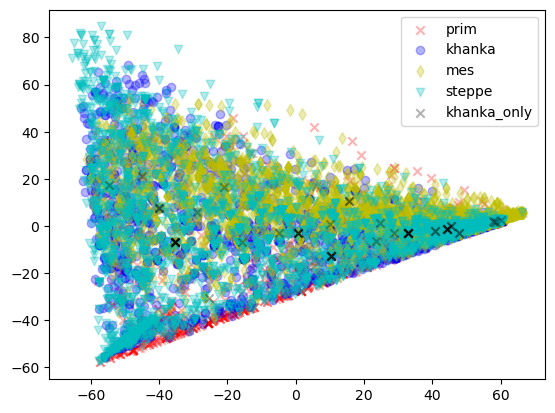

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only: [0.66270851 0.20171732]

Feature importances of all considered features:

GRS_2000 = 0.15256058815788642
URB_2000 = 0.13357911168904787
FOR_2000 = 0.13006003848735617
NVG_2000 = 0.11347626210359715
CULTRF_2000 = 0.10798697389756075
CULT_2000 = 0.10583618963726175
CULTIR_2000 = 0.0647419012718432
sq7 = 0.05358200157690879
sq3 = 0.04903802036283188
sq1 = 0.027606839522788675
sq2 = 0.020714518200432873
sq4 = 0.01923602540652223
sq5 = 0.013980113161755799
sq6 = 0.0076014165242064835


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

GRS_2000: 0.1570527366586531
URB_2000: 0.1343966793704679
FOR_2000: 0.13107227937009078
NVG_2000: 0.10905073682828739
CULTRF_2000: 0.1077021169802487
CULT_2000: 0.10442662073659456
CULTIR_2000: 0.06504513431316682
sq7: 0.05296619613313265
sq3: 0.049375285640826265
sq1: 0.028109611141463132
sq2: 0.025300340790866894
sq4: 0.020277575433450514
sq5: 0.015224686602751275


Balanced accuracy estimation for the best feature subset:

[0.49165328 0.45260144 0.49471172 0.48074089 0.44826365]


Balanced accuracy estimation for all features in the experiment:

[0.4714698  0.48676821 0.50041622 0.47390243 0.44629286]


Pair analysis. Feature set name: soil

Datasets to compare: prim, khanka

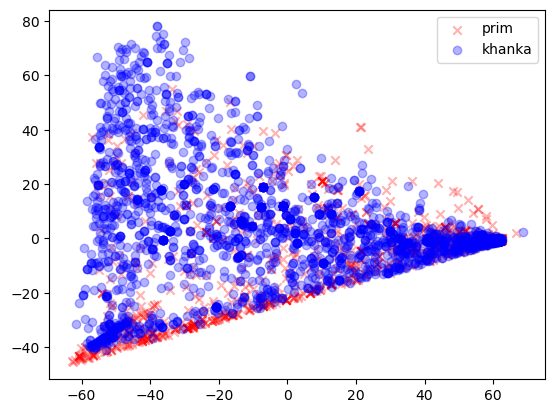

Explained coef ratio (LDA) for prim_khanka: [0.68283746 0.21607379]

Feature importances of all considered features:

GRS_2000 = 0.1440714177467924
FOR_2000 = 0.13437812215632094
URB_2000 = 0.12345509324411844
sq3 = 0.09690233285207937
CULT_2000 = 0.09227751170740474
CULTRF_2000 = 0.08756638863715918
sq7 = 0.08636884432032456
NVG_2000 = 0.07896274227988782
CULTIR_2000 = 0.0464753947531069
sq2 = 0.027777499050869008
sq1 = 0.02758769639578487
sq5 = 0.020353783618522952
sq4 = 0.019980380508981713
sq6 = 0.013842792728647082


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

GRS_2000: 0.15778025601512013
FOR_2000: 0.13772163552957778
URB_2000: 0.13020680875793894
sq3: 0.12085345428325343
CULT_2000: 0.09497767758940263
CULTRF_2000: 0.09048317234968288
sq7: 0.08511234123145903
NVG_2000: 0.08282791693939692
sq1: 0.05114530762807724
CULTIR_2000: 0.04889142967609107


Balanced accuracy estimation for the best feature subset:

[0.76179843 0.74131735 0.79310327 0.75983987 0.770807  ]


Balanced accuracy estimation for all features in the experiment:

[0.75231975 0.74353464 0.79673396 0.76222082 0.78016224]


Datasets to compare: prim, mes

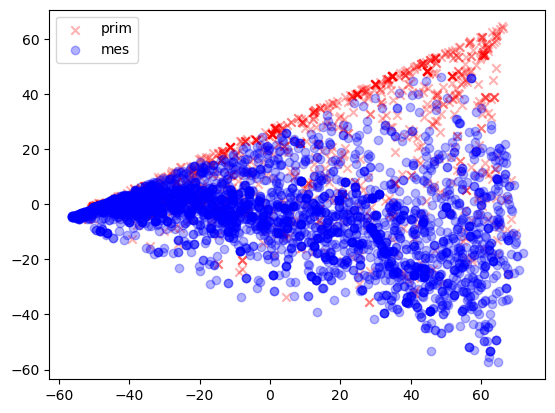

Explained coef ratio (LDA) for prim_mes: [0.68791101 0.15970881]

Feature importances of all considered features:

GRS_2000 = 0.15182543973410675
sq7 = 0.14900211602266158
URB_2000 = 0.09254115543760193
CULTRF_2000 = 0.09023113039083559
FOR_2000 = 0.08933883875077311
sq3 = 0.08304941052392435
CULT_2000 = 0.08139622687142818
CULTIR_2000 = 0.06520466220844068
sq5 = 0.05362506929685287
sq1 = 0.037735044490081825
NVG_2000 = 0.03479974164857653
sq2 = 0.02513578163276081
sq4 = 0.024071755632940114
sq6 = 0.02204362735901571


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

sq7: 0.19155708251231046
GRS_2000: 0.16094266686638956
sq3: 0.10816820205473639
URB_2000: 0.10397760807603426
FOR_2000: 0.09782236662749239
CULT_2000: 0.09251139745324666
CULTRF_2000: 0.08882356204501009
CULTIR_2000: 0.06508566617669202
sq5: 0.048817036694544534
sq2: 0.04229441149354368


Balanced accuracy estimation for the best feature subset:

[0.82103782 0.82905749 0.84809643 0.85090064 0.83553719]


Balanced accuracy estimation for all features in the experiment:

[0.82883553 0.84297194 0.856968   0.83492173 0.83177883]


Datasets to compare: prim, steppe

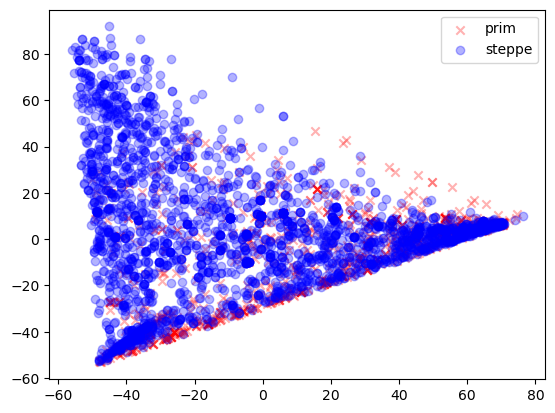

Explained coef ratio (LDA) for prim_steppe: [0.59210105 0.30325725]

Feature importances of all considered features:

GRS_2000 = 0.13308420537344118
FOR_2000 = 0.12278949381322941
URB_2000 = 0.11911194762038073
sq3 = 0.1057769275715284
sq7 = 0.10419596761505487
NVG_2000 = 0.1015011139718923
CULT_2000 = 0.09020143711475531
CULTRF_2000 = 0.08890016595198329
CULTIR_2000 = 0.042381717085597896
sq5 = 0.023403766433337015
sq1 = 0.02215038781308641
sq2 = 0.01916386713886818
sq4 = 0.018296372367420623
sq6 = 0.009042630129424493


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

GRS_2000: 0.1376376045613718
FOR_2000: 0.12440299104675771
URB_2000: 0.1160258905668273
sq7: 0.10422950199471541
NVG_2000: 0.09971631757922796
CULT_2000: 0.09905142768498085
sq3: 0.09495849063772427
CULTRF_2000: 0.087753145762186
CULTIR_2000: 0.04388431507001278
sq5: 0.02294072716986021
sq1: 0.020664802576890223
sq2: 0.020349182759155038
sq4: 0.018685840465766584
sq6: 0.009699762124524043


Balanced accuracy estimation for the best feature subset:

[0.78213069 0.77502168 0.76028243 0.75006161 0.7741528 ]


Balanced accuracy estimation for all features in the experiment:

[0.79016391 0.7830549  0.75739153 0.76235807 0.76885838]


Datasets to compare: prim, khanka_only

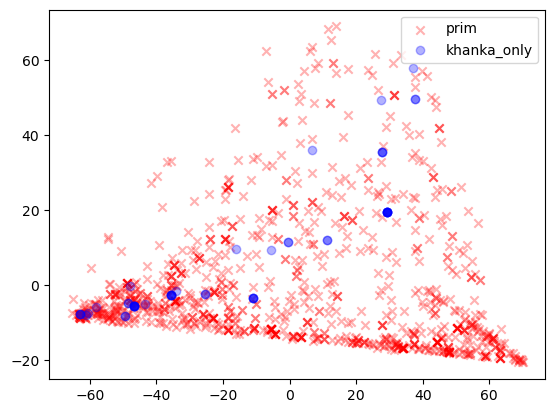

Explained coef ratio (LDA) for prim_khanka_only: [0.75024129 0.1600481 ]

Feature importances of all considered features:

URB_2000 = 0.19548268968075713
CULT_2000 = 0.13433408127802512
FOR_2000 = 0.12835636811593876
CULTRF_2000 = 0.1265676688433724
GRS_2000 = 0.12550281361242852
sq3 = 0.06183085667008575
sq2 = 0.05047128674181986
sq7 = 0.04935274557328552
CULTIR_2000 = 0.049237163361185124
sq1 = 0.03724396746851825
NVG_2000 = 0.026814075320040764
sq4 = 0.010198200659792428
sq5 = 0.004133872503195469
sq6 = 0.00047421017155494763


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

URB_2000: 0.18402268740978195
GRS_2000: 0.14113341640818455
CULTRF_2000: 0.12857438636932186
FOR_2000: 0.12568322383115427
CULT_2000: 0.11738985555959731
sq3: 0.07526342584593358
CULTIR_2000: 0.06357201895680448
sq2: 0.05380801580495574
sq7: 0.042457676421940024
sq1: 0.038469811011803426
NVG_2000: 0.02962548238052274


Balanced accuracy estimation for the best feature subset:

[0.90909091 0.9        0.9        0.77272727 0.90670996]


Balanced accuracy estimation for all features in the experiment:

[0.90909091 0.9        0.9        0.77272727 0.90670996]


Datasets to compare: khanka, mes

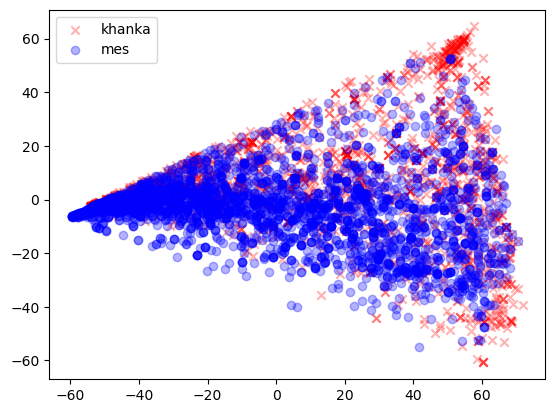

Explained coef ratio (LDA) for khanka_mes: [0.71758052 0.13617869]

Feature importances of all considered features:

GRS_2000 = 0.15295861457719923
URB_2000 = 0.12337692942363124
NVG_2000 = 0.11546416015910639
FOR_2000 = 0.10977998280152952
CULTRF_2000 = 0.10248211218504587
CULT_2000 = 0.09391992440876214
CULTIR_2000 = 0.061487232717426996
sq7 = 0.048528253018431035
sq1 = 0.04038768846290222
sq3 = 0.03984872351809108
sq2 = 0.035401659287020895
sq4 = 0.032007391265008484
sq5 = 0.022392585762026122
sq6 = 0.021964742413818808


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

GRS_2000: 0.15142601485084214
URB_2000: 0.12229821420475175
FOR_2000: 0.1118446732193097
NVG_2000: 0.11143269379275067
CULTRF_2000: 0.10201387178559734
CULT_2000: 0.09180509017207228
CULTIR_2000: 0.06546749500178568
sq7: 0.06250696329714575
sq3: 0.0445497627177017
sq2: 0.03767221486451967
sq4: 0.03399651931668011
sq5: 0.03294038734692841
sq1: 0.03204609942991487


Balanced accuracy estimation for the best feature subset:

[0.74798264 0.75226115 0.73252012 0.75537526 0.74237385]


Balanced accuracy estimation for all features in the experiment:

[0.74574892 0.74963127 0.73404966 0.75277162 0.73308473]


Datasets to compare: khanka, steppe

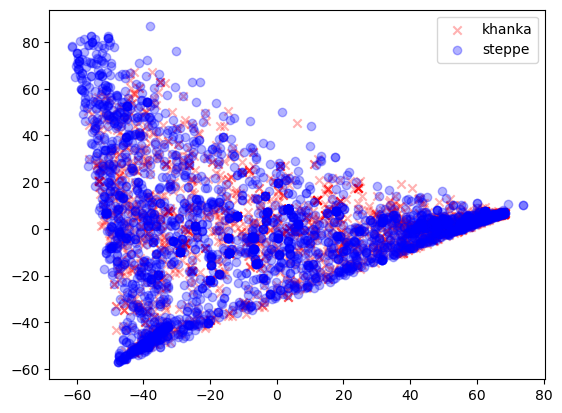

Explained coef ratio (LDA) for khanka_steppe: [0.63891478 0.25595138]

Feature importances of all considered features:

FOR_2000 = 0.16154723263509563
GRS_2000 = 0.1577474047899281
URB_2000 = 0.15576043665302194
CULT_2000 = 0.11890881700823559
CULTRF_2000 = 0.1146537486464476
NVG_2000 = 0.11239731915531664
CULTIR_2000 = 0.06436042222891582
sq1 = 0.022844789166152443
sq7 = 0.02240401157329421
sq3 = 0.02120992496631716
sq4 = 0.019241837475786328
sq2 = 0.017598678057095623
sq5 = 0.006965521487110837
sq6 = 0.004359856157282071


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

GRS_2000: 0.16729995957705657
FOR_2000: 0.16159085209451676
URB_2000: 0.1581190744297156
CULT_2000: 0.12169641452830993
CULTRF_2000: 0.11688503751370509
NVG_2000: 0.11147121675393219
CULTIR_2000: 0.06345674302721573
sq1: 0.031033597005262446
sq7: 0.02455958638716372
sq3: 0.023087579947257797
sq4: 0.020799938735864228


Balanced accuracy estimation for the best feature subset:

[0.61778009 0.63602514 0.61893471 0.62873221 0.616908  ]


Balanced accuracy estimation for all features in the experiment:

[0.61850801 0.63602514 0.61690185 0.626144   0.61764573]


Datasets to compare: khanka, khanka_only

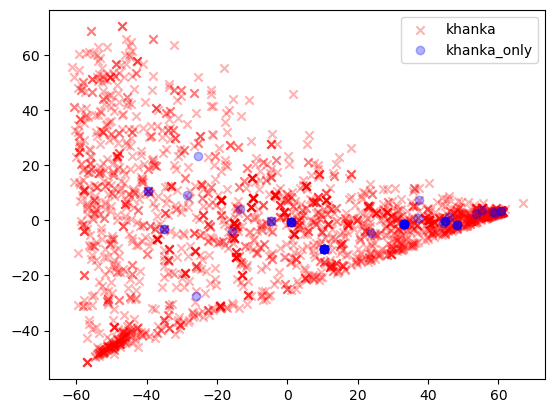

Explained coef ratio (LDA) for khanka_khanka_only: [0.70460209 0.19729224]

Feature importances of all considered features:

URB_2000 = 0.20416222087169525
FOR_2000 = 0.1827818387997605
GRS_2000 = 0.16316040177439697
CULTRF_2000 = 0.15198078719397154
CULT_2000 = 0.13437890760781412
sq1 = 0.03172290021363952
sq7 = 0.02655646063731613
CULTIR_2000 = 0.026044436897237982
sq3 = 0.023518460288371623
sq2 = 0.021976849979230745
NVG_2000 = 0.021594912291086156
sq4 = 0.011181275211270365
sq6 = 0.0005873096795958574
sq5 = 0.0003532385546132943


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

URB_2000: 0.25075612058825314
FOR_2000: 0.22138753109579012
GRS_2000: 0.2007707515016397
CULT_2000: 0.1739953780836268
CULTRF_2000: 0.15309021873069031


Balanced accuracy estimation for the best feature subset:

[0.79336283 0.69225664 0.76274945 0.5421286  0.81374723]


Balanced accuracy estimation for all features in the experiment:

[0.79336283 0.69225664 0.76385809 0.5864745  0.81263858]


Datasets to compare: mes, steppe

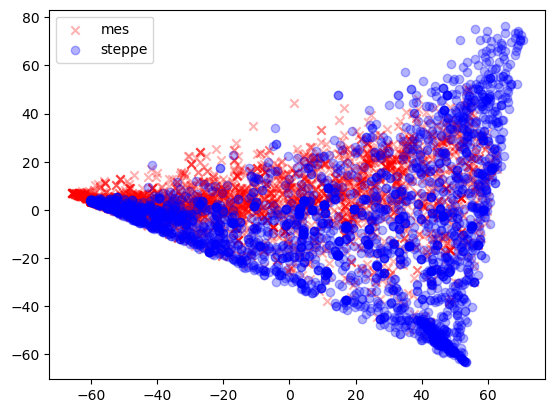

Explained coef ratio (LDA) for mes_steppe: [0.66348318 0.18669358]

Feature importances of all considered features:

NVG_2000 = 0.1963200624976415
GRS_2000 = 0.1400825515866541
CULTRF_2000 = 0.11745250243410715
FOR_2000 = 0.10561418395455052
CULT_2000 = 0.10024144285423588
URB_2000 = 0.09849126187897045
CULTIR_2000 = 0.051699738834084644
sq7 = 0.037759358627396204
sq3 = 0.03394464860412007
sq1 = 0.03262141932572139
sq2 = 0.027845094505492374
sq4 = 0.02323399534009136
sq5 = 0.021675696361121637
sq6 = 0.01301804319581262


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

NVG_2000: 0.2066918016269115
GRS_2000: 0.1466388698687223
CULTRF_2000: 0.12034572783042344
FOR_2000: 0.09952885149207684
CULT_2000: 0.09681934601802271
URB_2000: 0.0941779022345301
CULTIR_2000: 0.05177918308430425
sq7: 0.04144749699435205
sq3: 0.03698066385620249
sq1: 0.03271722137637438
sq2: 0.027112664246952474
sq4: 0.026897793734456298
sq5: 0.018862477636671007


Balanced accuracy estimation for the best feature subset:

[0.85049465 0.83981429 0.83885443 0.84398217 0.82299639]


Balanced accuracy estimation for all features in the experiment:

[0.84241318 0.84028531 0.84577713 0.8465193  0.82991909]


Datasets to compare: mes, khanka_only

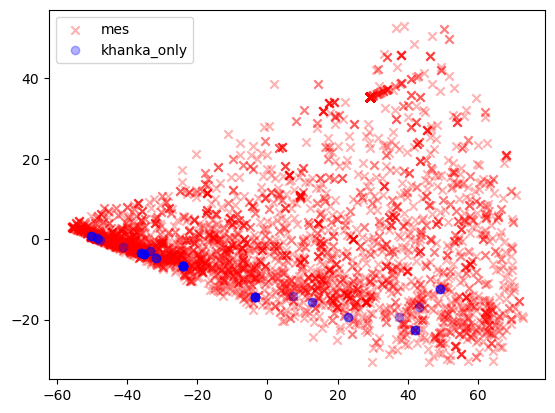

Explained coef ratio (LDA) for mes_khanka_only: [0.73434972 0.10840134]

Feature importances of all considered features:

URB_2000 = 0.1868687978464172
GRS_2000 = 0.17759755260913812
FOR_2000 = 0.16823133073762006
CULT_2000 = 0.16173457903758998
CULTRF_2000 = 0.15244530931594258
sq3 = 0.03349314152693103
sq1 = 0.029784308237875416
sq2 = 0.025207591244333756
sq7 = 0.023064488796231117
sq4 = 0.01876799171019574
CULTIR_2000 = 0.015089676587839676
NVG_2000 = 0.007168276983324337
sq6 = 0.00030266832069562817
sq5 = 0.0002442870458653061


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

URB_2000: 0.18477929038362934
FOR_2000: 0.18258033373509336
GRS_2000: 0.1809177560172695
CULTRF_2000: 0.15253725466809992
CULT_2000: 0.14865157037269572
sq1: 0.030538773825019
sq3: 0.027232436972024418
sq2: 0.02622141656803835
sq7: 0.023466105464704682
sq4: 0.020455341365889338
CULTIR_2000: 0.016992118851608774
NVG_2000: 0.005627601775927546


Balanced accuracy estimation for the best feature subset:

[0.84449794 0.72520661 0.77203857 0.86294766 0.84724518]


Balanced accuracy estimation for all features in the experiment:

[0.84518569 0.72520661 0.77203857 0.86294766 0.84724518]


Datasets to compare: steppe, khanka_only

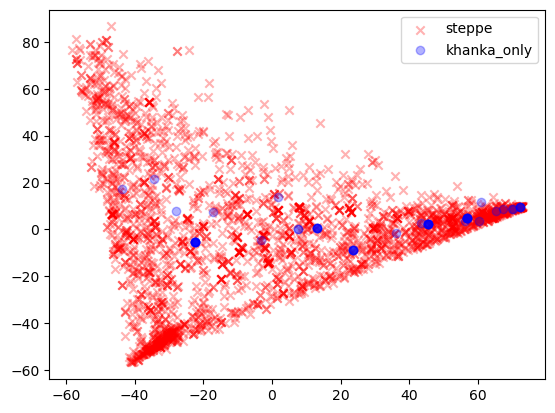

Explained coef ratio (LDA) for steppe_khanka_only: [0.59130752 0.29823688]

Feature importances of all considered features:

URB_2000 = 0.17433626602145558
FOR_2000 = 0.15690474141124103
CULTRF_2000 = 0.15236015141516854
GRS_2000 = 0.14962057586364416
CULT_2000 = 0.1394338097614356
NVG_2000 = 0.04535907947879122
CULTIR_2000 = 0.04515024104128315
sq2 = 0.03602769845156283
sq7 = 0.030234387233310945
sq1 = 0.03007656961592079
sq3 = 0.027252826120702074
sq4 = 0.009047874673927713
sq6 = 0.002129823953879894
sq5 = 0.0020659549576766256


Recursive feature elimination procedure, selection the most informative features from ['sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000']

URB_2000: 0.1918301373151788
GRS_2000: 0.1522464962371703
FOR_2000: 0.15085001563316788
CULTRF_2000: 0.1494005445574385
CULT_2000: 0.13588958375853627
sq2: 0.043041224107239415
NVG_2000: 0.040584779548687555
CULTIR_2000: 0.035699021669831736
sq1: 0.03071363075383312
sq3: 0.029525373769168802
sq7: 0.028157785868431477
sq4: 0.01206140678131618


Balanced accuracy estimation for the best feature subset:

[0.81818182 0.68181818 0.77272727 0.9        0.95      ]


Balanced accuracy estimation for all features in the experiment:

[0.81818182 0.68181818 0.77272727 0.9        0.95      ]


END OF COMPUTATIONS

All datasets. Feature set name: WC21

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

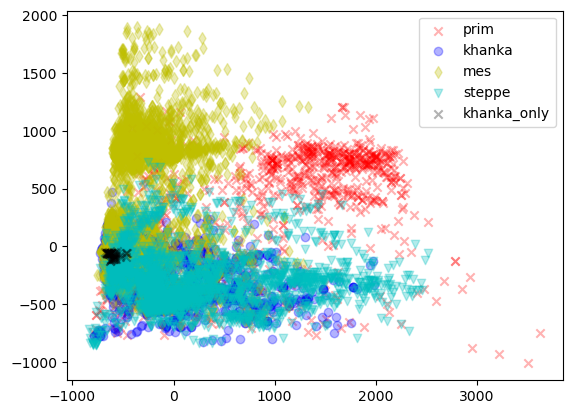

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only: [0.54832964 0.36845512]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.09268351060076943
wc2.1_30s_bio_16 = 0.0819243977594257
wc2.1_30s_bio_12 = 0.0758320656899006
wc2.1_30s_bio_13 = 0.06626786716956425
wc2.1_30s_bio_4 = 0.060861792770770175
wc2.1_30s_bio_8 = 0.05835964021245485
wc2.1_30s_bio_3 = 0.05214595910654063
wc2.1_30s_elev = 0.048172617274191434
wc2.1_30s_bio_1 = 0.046095310451748917
wc2.1_30s_bio_19 = 0.04564045836834348
wc2.1_30s_bio_15 = 0.04406681587125072
wc2.1_30s_bio_7 = 0.043233848301666745
wc2.1_30s_bio_10 = 0.041616768871401096
wc2.1_30s_bio_9 = 0.03998980963916884
wc2.1_30s_bio_2 = 0.038833763306567105
wc2.1_30s_bio_11 = 0.038311999845213655
wc2.1_30s_bio_17 = 0.03625359823150055
wc2.1_30s_bio_5 = 0.036225001589482594
wc2.1_30s_bio_6 = 0.03176094606890134
wc2.1_30s_bio_14 = 0.02172382887113805


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_18: 0.12319066308729329
wc2.1_30s_bio_12: 0.11340775052805531
wc2.1_30s_bio_4: 0.10954213407344811
wc2.1_30s_bio_16: 0.0919329941024936
wc2.1_30s_bio_8: 0.09167162091419456
wc2.1_30s_bio_3: 0.08417035736850499
wc2.1_30s_bio_13: 0.08220147623876795
wc2.1_30s_bio_10: 0.07946257156410788
wc2.1_30s_bio_15: 0.07786831521783669
wc2.1_30s_elev: 0.07671950750914724
wc2.1_30s_bio_7: 0.0698326093961504


Balanced accuracy estimation for the best feature subset:

[0.59468474 0.53320989 0.57281051 0.58705865 0.51319643]


Balanced accuracy estimation for all features in the experiment:

[0.62081075 0.54239108 0.55659237 0.58887493 0.49339515]


Pair analysis. Feature set name: WC21

Datasets to compare: prim, khanka

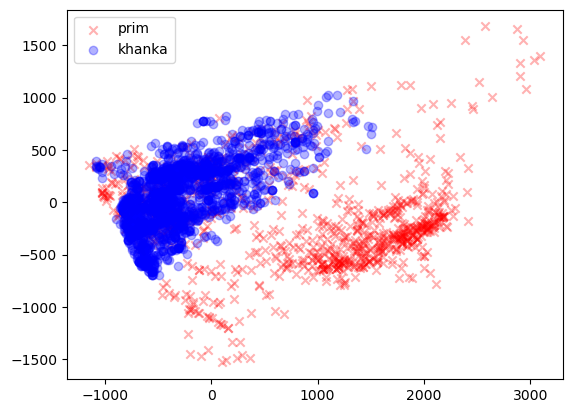

Explained coef ratio (LDA) for prim_khanka: [0.79065588 0.16332631]

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.197248288932957
wc2.1_30s_bio_17 = 0.07265176585650174
wc2.1_30s_bio_19 = 0.07056063842163025
wc2.1_30s_bio_4 = 0.06673789397239614
wc2.1_30s_bio_15 = 0.06554163341927423
wc2.1_30s_bio_14 = 0.058418259829557596
wc2.1_30s_bio_12 = 0.05209382188204907
wc2.1_30s_bio_9 = 0.04867171234465608
wc2.1_30s_bio_10 = 0.04602653537197237
wc2.1_30s_bio_7 = 0.043424957181816645
wc2.1_30s_elev = 0.038899781436889984
wc2.1_30s_bio_5 = 0.036536860135272325
wc2.1_30s_bio_2 = 0.03212021730424315
wc2.1_30s_bio_3 = 0.03169856074162098
wc2.1_30s_bio_1 = 0.030606602481824452
wc2.1_30s_bio_11 = 0.02316541880353494
wc2.1_30s_bio_6 = 0.02270554938889565
wc2.1_30s_bio_16 = 0.021874971139435567
wc2.1_30s_bio_18 = 0.020748856154709193
wc2.1_30s_bio_13 = 0.020267675200762728


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_8: 0.17135280597147512
wc2.1_30s_bio_19: 0.09917178706489656
wc2.1_30s_bio_17: 0.0882378637960735
wc2.1_30s_bio_4: 0.07553706113200023
wc2.1_30s_bio_14: 0.07193941102099369
wc2.1_30s_bio_7: 0.06319727976843047
wc2.1_30s_bio_15: 0.05955892268658318
wc2.1_30s_bio_12: 0.053581773282759336
wc2.1_30s_bio_10: 0.04699739359713061
wc2.1_30s_bio_9: 0.04086753770675638
wc2.1_30s_elev: 0.038557890247803
wc2.1_30s_bio_3: 0.03713281685231375
wc2.1_30s_bio_1: 0.03704648034306574
wc2.1_30s_bio_5: 0.03548320815356778
wc2.1_30s_bio_2: 0.03122454017175952
wc2.1_30s_bio_11: 0.02689759072566302
wc2.1_30s_bio_6: 0.023215637478728162


Balanced accuracy estimation for the best feature subset:

[0.83545255 0.78492765 0.79471107 0.82361989 0.82234513]


Balanced accuracy estimation for all features in the experiment:

[0.84114816 0.79188428 0.78553714 0.82804467 0.82693847]


Datasets to compare: prim, mes

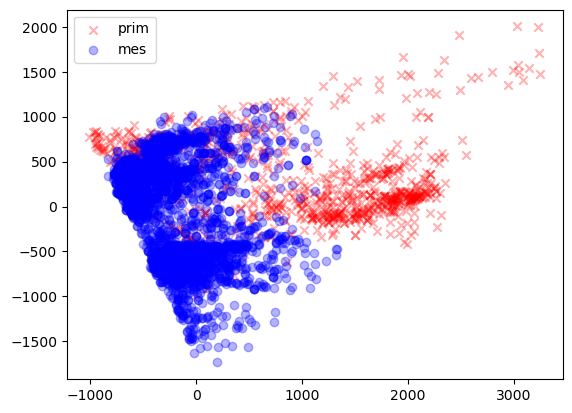

Explained coef ratio (LDA) for prim_mes: [0.56421197 0.36518531]

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.20012604199325948
wc2.1_30s_bio_10 = 0.1469394563026381
wc2.1_30s_bio_5 = 0.09331836057730529
wc2.1_30s_bio_4 = 0.08121749745572346
wc2.1_30s_bio_15 = 0.050913583654291175
wc2.1_30s_bio_19 = 0.0468585245365593
wc2.1_30s_bio_7 = 0.04429843433333208
wc2.1_30s_bio_1 = 0.039759146710418865
wc2.1_30s_elev = 0.03958730293969015
wc2.1_30s_bio_18 = 0.034534367887265584
wc2.1_30s_bio_9 = 0.03404234498339974
wc2.1_30s_bio_17 = 0.028182578584015804
wc2.1_30s_bio_3 = 0.025155471316586457
wc2.1_30s_bio_16 = 0.02425135278422798
wc2.1_30s_bio_12 = 0.024035273768073247
wc2.1_30s_bio_2 = 0.022268747826945046
wc2.1_30s_bio_13 = 0.02036545187614876
wc2.1_30s_bio_11 = 0.01938160498941078
wc2.1_30s_bio_6 = 0.01584426513772473
wc2.1_30s_bio_14 = 0.00892019234298417


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_8: 0.21616657554623359
wc2.1_30s_bio_10: 0.17384700492784483
wc2.1_30s_bio_4: 0.10669253425760011
wc2.1_30s_bio_5: 0.09681650980716991
wc2.1_30s_elev: 0.05338320185376581
wc2.1_30s_bio_1: 0.04042306710964138
wc2.1_30s_bio_15: 0.04014727454161059
wc2.1_30s_bio_9: 0.03828132248987434
wc2.1_30s_bio_7: 0.03655827685893686
wc2.1_30s_bio_18: 0.03188142213011895
wc2.1_30s_bio_3: 0.03065941404744367
wc2.1_30s_bio_19: 0.02744931678489282
wc2.1_30s_bio_16: 0.025655156076173347
wc2.1_30s_bio_12: 0.023049044999581002
wc2.1_30s_bio_11: 0.022372896508257592
wc2.1_30s_bio_13: 0.022224884143996596
wc2.1_30s_bio_17: 0.014392097916858623


Balanced accuracy estimation for the best feature subset:

[0.90505007 0.90970781 0.89143917 0.89137683 0.88559622]


Balanced accuracy estimation for all features in the experiment:

[0.9019917  0.90733814 0.88807724 0.88931355 0.88797717]


Datasets to compare: prim, steppe

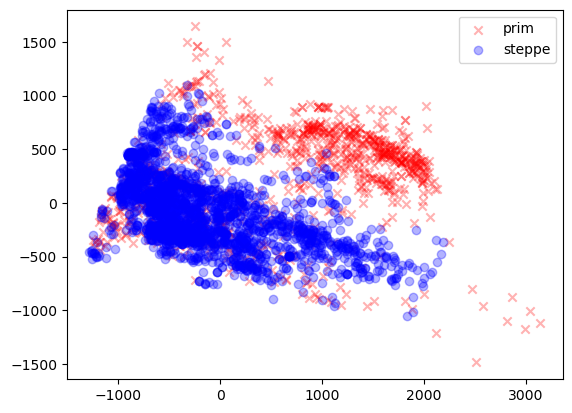

Explained coef ratio (LDA) for prim_steppe: [0.75865063 0.1816836 ]

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.101296631385062
wc2.1_30s_bio_19 = 0.0954134030530831
wc2.1_30s_bio_17 = 0.0919975998846218
wc2.1_30s_bio_4 = 0.07999781132769657
wc2.1_30s_bio_5 = 0.06832601439205313
wc2.1_30s_bio_8 = 0.06699765177722475
wc2.1_30s_bio_7 = 0.05871667126710607
wc2.1_30s_bio_1 = 0.04876958863668604
wc2.1_30s_bio_10 = 0.04789699681277073
wc2.1_30s_bio_14 = 0.04455321063978402
wc2.1_30s_bio_3 = 0.03619413678182957
wc2.1_30s_bio_16 = 0.0330825332539458
wc2.1_30s_bio_15 = 0.03175770510862743
wc2.1_30s_elev = 0.03169298583507362
wc2.1_30s_bio_9 = 0.030160089320206876
wc2.1_30s_bio_2 = 0.028924569632367014
wc2.1_30s_bio_11 = 0.027643479072222754
wc2.1_30s_bio_6 = 0.02695694289257605
wc2.1_30s_bio_18 = 0.024976130099534474
wc2.1_30s_bio_13 = 0.024645848827528294


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_12: 0.16489961694049582
wc2.1_30s_bio_17: 0.10785718575658129
wc2.1_30s_bio_19: 0.09538834213733911
wc2.1_30s_bio_5: 0.07401074151990437
wc2.1_30s_bio_4: 0.07287307891397624
wc2.1_30s_bio_1: 0.05361467688971224
wc2.1_30s_bio_8: 0.05177888533984708
wc2.1_30s_bio_10: 0.047844418714237294
wc2.1_30s_bio_16: 0.04345344960956819
wc2.1_30s_bio_3: 0.04058776912334485
wc2.1_30s_bio_14: 0.03984347063582958
wc2.1_30s_bio_7: 0.039105530525744885
wc2.1_30s_bio_15: 0.0343808783211772
wc2.1_30s_bio_9: 0.034350986212437803
wc2.1_30s_elev: 0.03398494195196037
wc2.1_30s_bio_11: 0.03364351894085388
wc2.1_30s_bio_2: 0.03238250846698985


Balanced accuracy estimation for the best feature subset:

[0.79559093 0.8199753  0.80980894 0.81843588 0.81683831]


Balanced accuracy estimation for all features in the experiment:

[0.80113621 0.83367207 0.81732092 0.81936009 0.80454185]


Datasets to compare: prim, khanka_only

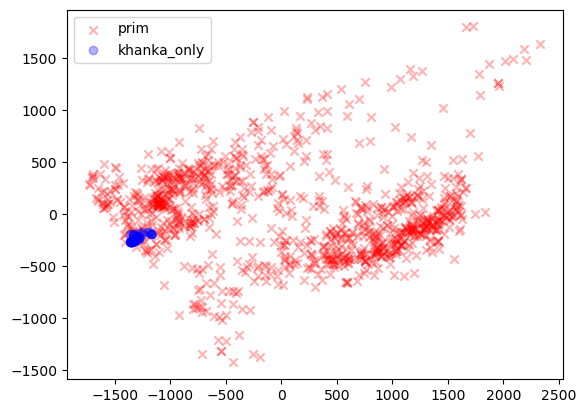

Explained coef ratio (LDA) for prim_khanka_only: [0.82392132 0.14574161]

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.2544901412319073
wc2.1_30s_bio_10 = 0.16034762408477898
wc2.1_30s_bio_5 = 0.12038731452785374
wc2.1_30s_elev = 0.08473244717794402
wc2.1_30s_bio_18 = 0.06414709670675739
wc2.1_30s_bio_13 = 0.03707426069648356
wc2.1_30s_bio_4 = 0.03284555499783977
wc2.1_30s_bio_12 = 0.03128488930999612
wc2.1_30s_bio_11 = 0.02940700431905617
wc2.1_30s_bio_15 = 0.025471903898832967
wc2.1_30s_bio_6 = 0.023225758155220273
wc2.1_30s_bio_19 = 0.022810868492045847
wc2.1_30s_bio_16 = 0.01926195837353827
wc2.1_30s_bio_1 = 0.017427195316944137
wc2.1_30s_bio_9 = 0.016053865990765238
wc2.1_30s_bio_14 = 0.015030473456336927
wc2.1_30s_bio_3 = 0.014944590757743084
wc2.1_30s_bio_2 = 0.011777717371720413
wc2.1_30s_bio_7 = 0.009848803771007993
wc2.1_30s_bio_17 = 0.009430531363227818


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_10: 0.3689061632208279
wc2.1_30s_bio_8: 0.3010034003925631
wc2.1_30s_bio_5: 0.15811194986947244
wc2.1_30s_elev: 0.0978144690922317
wc2.1_30s_bio_18: 0.07416401742490472


Balanced accuracy estimation for the best feature subset:

[1. 1. 1. 1. 1.]


Balanced accuracy estimation for all features in the experiment:

[1. 1. 1. 1. 1.]


Datasets to compare: khanka, mes

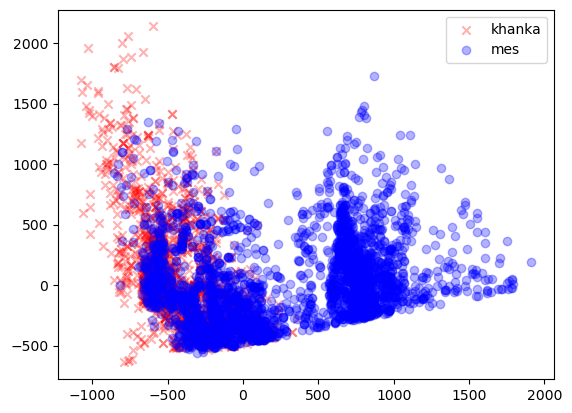

Explained coef ratio (LDA) for khanka_mes: [0.62455833 0.29153976]

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.11117816128855762
wc2.1_30s_bio_16 = 0.1057370639783796
wc2.1_30s_bio_18 = 0.08014764743990689
wc2.1_30s_bio_13 = 0.06477325221566091
wc2.1_30s_bio_1 = 0.057517559182242925
wc2.1_30s_bio_4 = 0.05636522939740556
wc2.1_30s_bio_11 = 0.05284722832596718
wc2.1_30s_bio_7 = 0.050524196506479685
wc2.1_30s_elev = 0.045425227020949824
wc2.1_30s_bio_6 = 0.04186599673400254
wc2.1_30s_bio_15 = 0.03943443759619066
wc2.1_30s_bio_10 = 0.03890833827069939
wc2.1_30s_bio_8 = 0.0388260592945434
wc2.1_30s_bio_2 = 0.03875301768559148
wc2.1_30s_bio_3 = 0.037645158154899286
wc2.1_30s_bio_9 = 0.03635286543014247
wc2.1_30s_bio_5 = 0.02985764363646999
wc2.1_30s_bio_17 = 0.029026032961140515
wc2.1_30s_bio_19 = 0.026315236995610253
wc2.1_30s_bio_14 = 0.018499647885159655


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_12: 0.1262351090456738
wc2.1_30s_bio_16: 0.10343321716570943
wc2.1_30s_bio_18: 0.10325564033888242
wc2.1_30s_bio_11: 0.0758624027512783
wc2.1_30s_bio_1: 0.07280698203612318
wc2.1_30s_bio_13: 0.06952367835354761
wc2.1_30s_elev: 0.05973753256714426
wc2.1_30s_bio_10: 0.05831535158490895
wc2.1_30s_bio_4: 0.05801582021748675
wc2.1_30s_bio_7: 0.05737332002108868
wc2.1_30s_bio_6: 0.056775190043074
wc2.1_30s_bio_15: 0.05590858752401745
wc2.1_30s_bio_2: 0.05347360160801466
wc2.1_30s_bio_3: 0.049283566743050546


Balanced accuracy estimation for the best feature subset:

[0.76950316 0.76935688 0.7726983  0.76810791 0.76041457]


Balanced accuracy estimation for all features in the experiment:

[0.76810442 0.76948183 0.75114143 0.75759256 0.75391386]


Datasets to compare: khanka, steppe

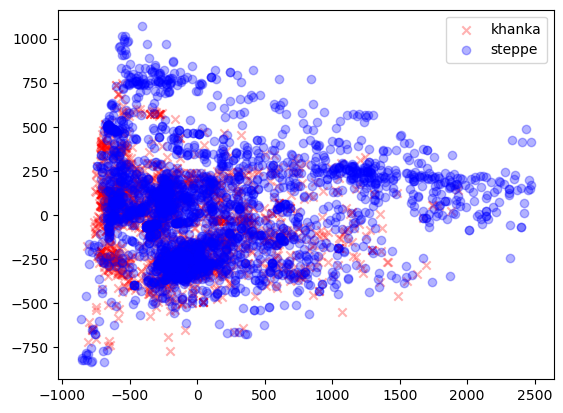

Explained coef ratio (LDA) for khanka_steppe: [0.78034081 0.16766096]

Feature importances of all considered features:

wc2.1_30s_bio_3 = 0.08097272881925141
wc2.1_30s_bio_18 = 0.07951236611359849
wc2.1_30s_bio_4 = 0.0718660550564546
wc2.1_30s_bio_15 = 0.058262277113894714
wc2.1_30s_elev = 0.05779672937374883
wc2.1_30s_bio_9 = 0.0577179273182418
wc2.1_30s_bio_16 = 0.05306378850827669
wc2.1_30s_bio_11 = 0.052526089580396826
wc2.1_30s_bio_13 = 0.051491798076923126
wc2.1_30s_bio_12 = 0.04974949936730333
wc2.1_30s_bio_2 = 0.04831125093571061
wc2.1_30s_bio_1 = 0.048201840478333
wc2.1_30s_bio_6 = 0.046337833988541445
wc2.1_30s_bio_8 = 0.04462154838520235
wc2.1_30s_bio_10 = 0.043324081453107205
wc2.1_30s_bio_7 = 0.039425304095960866
wc2.1_30s_bio_5 = 0.03800606396577419
wc2.1_30s_bio_19 = 0.03193422215158001
wc2.1_30s_bio_17 = 0.02982261375256303
wc2.1_30s_bio_14 = 0.017055981465137423


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_18: 0.2591410070362523
wc2.1_30s_bio_4: 0.2584411056885906
wc2.1_30s_bio_3: 0.2552491427388015
wc2.1_30s_bio_15: 0.22716874453635566


Balanced accuracy estimation for the best feature subset:

[0.65219685 0.70396717 0.64110357 0.66513519 0.67123173]


Balanced accuracy estimation for all features in the experiment:

[0.64336161 0.68990766 0.65921284 0.67252686 0.67493268]


Datasets to compare: khanka, khanka_only

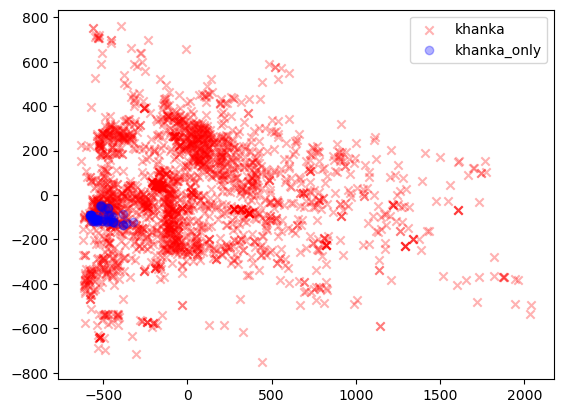

Explained coef ratio (LDA) for khanka_khanka_only: [0.75307997 0.17694862]

Feature importances of all considered features:

wc2.1_30s_bio_15 = 0.08940157671143288
wc2.1_30s_bio_10 = 0.07730041378528853
wc2.1_30s_bio_12 = 0.07377305197579469
wc2.1_30s_bio_16 = 0.06496451469489876
wc2.1_30s_bio_6 = 0.059340365473832056
wc2.1_30s_bio_1 = 0.05393257471790389
wc2.1_30s_bio_4 = 0.05009967165947267
wc2.1_30s_bio_17 = 0.049090777137677497
wc2.1_30s_bio_11 = 0.04852916953600259
wc2.1_30s_bio_9 = 0.04625264949314918
wc2.1_30s_bio_7 = 0.045945452765995716
wc2.1_30s_bio_3 = 0.045853350608744944
wc2.1_30s_bio_8 = 0.044842442246458995
wc2.1_30s_bio_13 = 0.04426919352564152
wc2.1_30s_bio_5 = 0.041028581534664266
wc2.1_30s_elev = 0.03844648278047245
wc2.1_30s_bio_19 = 0.03582381166367521
wc2.1_30s_bio_2 = 0.035367453987707784
wc2.1_30s_bio_18 = 0.033580993995472735
wc2.1_30s_bio_14 = 0.022157471705713572


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_15: 1.0


Balanced accuracy estimation for the best feature subset:

[0.79446903 0.68783186 0.58093126 0.7195122  0.62527716]


Balanced accuracy estimation for all features in the experiment:

[0.64336283 0.64336283 0.67738359 0.62971175 0.66962306]


Datasets to compare: mes, steppe

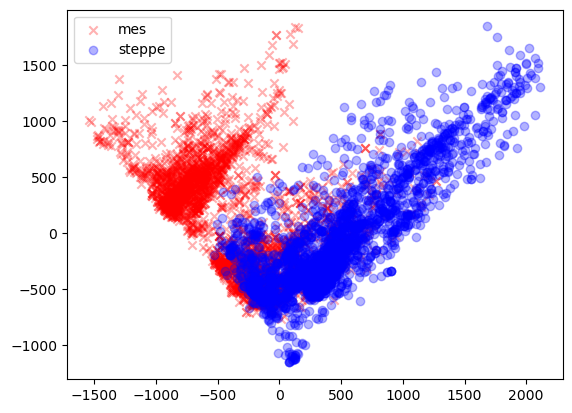

Explained coef ratio (LDA) for mes_steppe: [0.55566012 0.35508438]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.15800419443081395
wc2.1_30s_bio_16 = 0.12612153314739027
wc2.1_30s_bio_12 = 0.09076791464550112
wc2.1_30s_bio_13 = 0.08992066436908733
wc2.1_30s_bio_8 = 0.05717433764904669
wc2.1_30s_elev = 0.052714794233930974
wc2.1_30s_bio_10 = 0.04596455189825941
wc2.1_30s_bio_1 = 0.04542221906829397
wc2.1_30s_bio_3 = 0.042598628881732194
wc2.1_30s_bio_2 = 0.042114744978497376
wc2.1_30s_bio_15 = 0.034148635590730524
wc2.1_30s_bio_4 = 0.028986794061063553
wc2.1_30s_bio_9 = 0.0264157456132243
wc2.1_30s_bio_11 = 0.026300366285499758
wc2.1_30s_bio_5 = 0.02491587562302477
wc2.1_30s_bio_17 = 0.023242411608507298
wc2.1_30s_bio_19 = 0.02179722552881249
wc2.1_30s_bio_14 = 0.021796312742796635
wc2.1_30s_bio_7 = 0.020832859851064426
wc2.1_30s_bio_6 = 0.020760189792722913


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_18: 0.13386033897914107
wc2.1_30s_bio_16: 0.13282821960130767
wc2.1_30s_bio_12: 0.11226274505078797
wc2.1_30s_bio_13: 0.10731086327978129
wc2.1_30s_bio_8: 0.061894313754783624
wc2.1_30s_elev: 0.052851942122682474
wc2.1_30s_bio_10: 0.048269291872832784
wc2.1_30s_bio_3: 0.04667019716572132
wc2.1_30s_bio_2: 0.041020497505485025
wc2.1_30s_bio_1: 0.03884425159394576
wc2.1_30s_bio_15: 0.032017882432284483
wc2.1_30s_bio_4: 0.027904959230519843
wc2.1_30s_bio_9: 0.025959964567036198
wc2.1_30s_bio_11: 0.024825020437587848
wc2.1_30s_bio_5: 0.02370449949014813
wc2.1_30s_bio_17: 0.023603531253715723
wc2.1_30s_bio_7: 0.023051983761020307
wc2.1_30s_bio_19: 0.02235101894612092
wc2.1_30s_bio_6: 0.0207684789550976


Balanced accuracy estimation for the best feature subset:

[0.87660911 0.86714099 0.86545679 0.8819106  0.85900511]


Balanced accuracy estimation for all features in the experiment:

[0.86996799 0.87520559 0.86476808 0.87522342 0.85992932]


Datasets to compare: mes, khanka_only

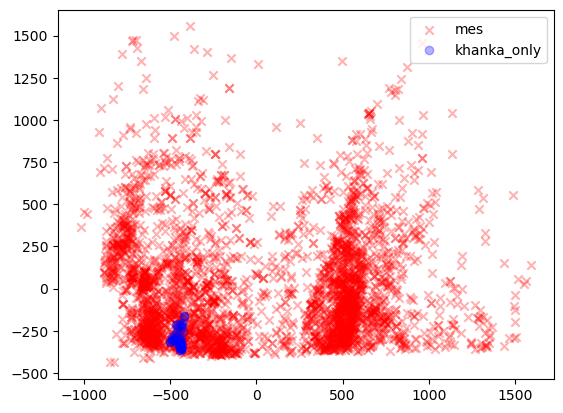

Explained coef ratio (LDA) for mes_khanka_only: [0.68404039 0.22563326]

Feature importances of all considered features:

wc2.1_30s_bio_15 = 0.0907354292087096
wc2.1_30s_elev = 0.07203068933365717
wc2.1_30s_bio_1 = 0.07026050091296182
wc2.1_30s_bio_18 = 0.06343471584147026
wc2.1_30s_bio_6 = 0.05913744601800591
wc2.1_30s_bio_11 = 0.05575701573765892
wc2.1_30s_bio_4 = 0.05405288251227052
wc2.1_30s_bio_10 = 0.05295879434891528
wc2.1_30s_bio_16 = 0.051263735629138954
wc2.1_30s_bio_7 = 0.050585975923112425
wc2.1_30s_bio_2 = 0.04632413255057728
wc2.1_30s_bio_13 = 0.046315571163150125
wc2.1_30s_bio_17 = 0.04607262112497561
wc2.1_30s_bio_3 = 0.0438037998369023
wc2.1_30s_bio_12 = 0.042581344425987974
wc2.1_30s_bio_9 = 0.040546326959484166
wc2.1_30s_bio_19 = 0.03824816054106483
wc2.1_30s_bio_5 = 0.033977750296520746
wc2.1_30s_bio_8 = 0.028496507199913722
wc2.1_30s_bio_14 = 0.01341660043552245


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_bio_15: 0.09866034533912696
wc2.1_30s_bio_1: 0.08800608214788073
wc2.1_30s_bio_11: 0.07560738241664787
wc2.1_30s_bio_18: 0.06667419323316286
wc2.1_30s_bio_4: 0.06477118477681404
wc2.1_30s_bio_16: 0.06040664368540672
wc2.1_30s_elev: 0.05906969730870987
wc2.1_30s_bio_2: 0.05861390222379537
wc2.1_30s_bio_13: 0.05798538583302574
wc2.1_30s_bio_10: 0.05694661539511691
wc2.1_30s_bio_6: 0.05501201505752968
wc2.1_30s_bio_9: 0.05414444541615457
wc2.1_30s_bio_7: 0.04657622975767906
wc2.1_30s_bio_19: 0.04525163721859278
wc2.1_30s_bio_12: 0.040171061006925295
wc2.1_30s_bio_17: 0.037925919220495485
wc2.1_30s_bio_8: 0.03417725996293618


Balanced accuracy estimation for the best feature subset:

[0.89931224 0.8161157  0.81473829 0.76859504 0.84724518]


Balanced accuracy estimation for all features in the experiment:

[0.79862448 0.76997245 0.76928375 0.76859504 0.84724518]


Datasets to compare: steppe, khanka_only

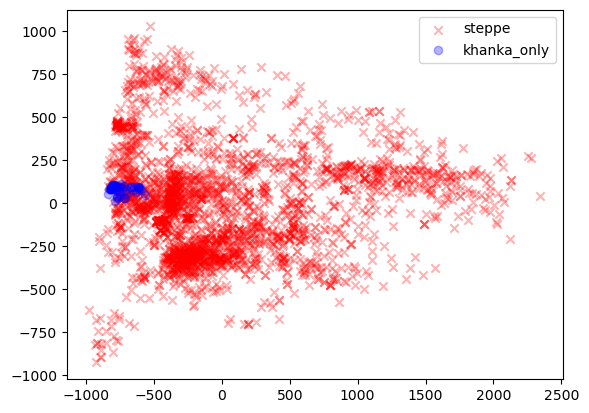

Explained coef ratio (LDA) for steppe_khanka_only: [0.78146597 0.17435163]

Feature importances of all considered features:

wc2.1_30s_bio_16 = 0.09143253545047632
wc2.1_30s_bio_12 = 0.08047844833376672
wc2.1_30s_bio_18 = 0.07758706164024201
wc2.1_30s_bio_13 = 0.076389737270991
wc2.1_30s_elev = 0.07323846766527194
wc2.1_30s_bio_4 = 0.05448228318136457
wc2.1_30s_bio_3 = 0.05133172569076074
wc2.1_30s_bio_6 = 0.05132631211281384
wc2.1_30s_bio_17 = 0.05030688365412651
wc2.1_30s_bio_11 = 0.05016181235099957
wc2.1_30s_bio_7 = 0.04836659491349743
wc2.1_30s_bio_9 = 0.04679591506791396
wc2.1_30s_bio_15 = 0.04524506795095577
wc2.1_30s_bio_5 = 0.03686880279627742
wc2.1_30s_bio_1 = 0.03661697982006421
wc2.1_30s_bio_8 = 0.036566689841145056
wc2.1_30s_bio_14 = 0.033910578615885534
wc2.1_30s_bio_10 = 0.030755217721939454
wc2.1_30s_bio_19 = 0.023535850126470928
wc2.1_30s_bio_2 = 0.00460303579503699


Recursive feature elimination procedure, selection the most informative features from ['wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev']

wc2.1_30s_elev: 0.1730450134626734
wc2.1_30s_bio_18: 0.1462561412143894
wc2.1_30s_bio_13: 0.13959245015393418
wc2.1_30s_bio_15: 0.13388234952446829
wc2.1_30s_bio_4: 0.09691864525404227
wc2.1_30s_bio_16: 0.09645487493965135
wc2.1_30s_bio_17: 0.09368237071372243
wc2.1_30s_bio_7: 0.06368704939193802
wc2.1_30s_bio_12: 0.05648110534518082


Balanced accuracy estimation for the best feature subset:

[0.95454545 1.         1.         1.         1.        ]


Balanced accuracy estimation for all features in the experiment:

[0.95454545 1.         1.         1.         1.        ]


END OF COMPUTATIONS

All datasets. Feature set name: all_features

datasets: ['prim', 'khanka', 'mes', 'steppe', 'khanka_only']

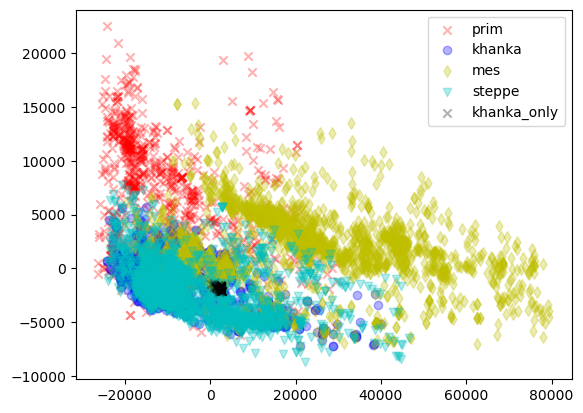

Explained coef ratio (LDA) for prim_khanka_mes_steppe_khanka_only: [0.94595537 0.03863033]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.0567248798903746
wc2.1_30s_bio_12 = 0.0430591554842041
current_30arcsec_aridityIndexThornthwaite = 0.037185884090381795
wc2.1_30s_bio_16 = 0.036895349249204686
ai_v3_yr = 0.03571181599829254
current_30arcsec_continentality = 0.033712523734623766
wc2.1_30s_bio_8 = 0.03360046130771718
wc2.1_30s_bio_13 = 0.03224720296036098
current_30arcsec_minTempWarmest = 0.03199254813704494
current_30arcsec_embergerQ = 0.031719909484186806
wc2.1_30s_bio_4 = 0.030200430305519946
wc2.1_30s_bio_3 = 0.022819482436021037
current_30arcsec_PETWettestQuarter = 0.021764697376591403
current_30arcsec_PETseasonality = 0.021357855682806716
current_30arcsec_climaticMoistureIndex = 0.021277188647666437
wc2.1_30s_bio_10 = 0.020535323559520507
wc2.1_30s_bio_1 = 0.01949060580319943
wc2.1_30s_bio_19 = 0.0192249654528849
wc2.1_30s_bio_7 = 0.019030018739607198
wc2.1_30s_bio_15 = 0.01887986431288104
current_30arcsec_growingDegDays5 = 0.018802924033447944
wc2.1_30s_elev = 0.018495398199703094
current_30a

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_13: 0.05404329607201436
wc2.1_30s_bio_18: 0.048905766967598824
wc2.1_30s_bio_16: 0.0381800708244992
wc2.1_30s_bio_8: 0.03542107277005819
current_30arcsec_aridityIndexThornthwaite: 0.03422140497369289
current_30arcsec_continentality: 0.03281244674879392
wc2.1_30s_bio_12: 0.032390257404626394
ai_v3_yr: 0.030620534720601476
current_30arcsec_embergerQ: 0.02995060384221272
current_30arcsec_minTempWarmest: 0.02881735159665217
wc2.1_30s_bio_4: 0.028255656559624875
current_30arcsec_climaticMoistureIndex: 0.025726731697772225
wc2.1_30s_bio_3: 0.021870505569987705
wc2.1_30s_bio_15: 0.021627468548122156
current_30arcsec_PETseasonality: 0.020762103618235536
current_30arcsec_PETWettestQuarter: 0.020079496982902626
wc2.1_30s_bio_1: 0.019778541307679896
wc2.1_30s_bio_19: 0.019402605541340868
wc2.1_30s_elev: 0.019068593051621494
wc2.1_30s_bio_17: 0.018993479200128928
current_30arcsec_annualPET: 0.018727550396913248
current_30arcsec_growingDegDays5: 0.018606415918332998
et0_v3_yr: 0.01834

Balanced accuracy estimation for the best feature subset:

[0.62413694 0.54731912 0.54337707 0.54092124 0.56023921]


Balanced accuracy estimation for all features in the experiment:

[0.59997512 0.50549925 0.56510738 0.57991693 0.56608204]


Pair analysis. Feature set name: all_features

Datasets to compare: prim, khanka

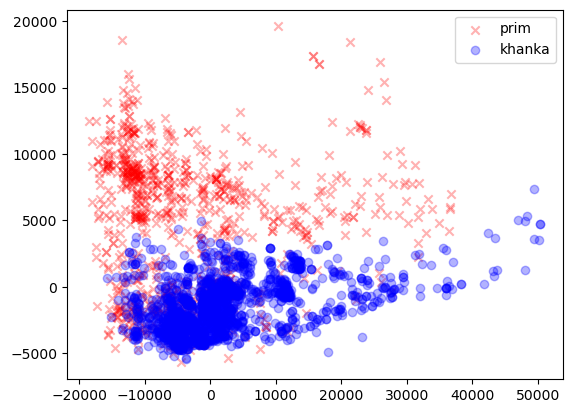

Explained coef ratio (LDA) for prim_khanka: [0.81815244 0.15264574]

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.0883829642228651
wc2.1_30s_bio_19 = 0.07081265133297306
wc2.1_30s_bio_17 = 0.06667477742883242
current_30arcsec_continentality = 0.056344599790026775
current_30arcsec_PETWettestQuarter = 0.05350552034376273
current_30arcsec_embergerQ = 0.0461755979979976
wc2.1_30s_bio_15 = 0.04183752046269604
wc2.1_30s_bio_12 = 0.04084176599228106
ai_v3_yr = 0.03154948524755722
wc2.1_30s_bio_14 = 0.029440413165004304
wc2.1_30s_bio_4 = 0.027603937194057748
wc2.1_30s_bio_7 = 0.023424866805716697
current_30arcsec_PETseasonality = 0.021122049034233845
current_30arcsec_topoWet = 0.01864213425503632
wc2.1_30s_bio_9 = 0.018528999496590027
wc2.1_30s_bio_10 = 0.01835528327892964
current_30arcsec_annualPET = 0.015976668382720112
current_30arcsec_PETDriestQuarter = 0.015702752343798
current_30arcsec_PETWarmestQuarter = 0.01531516473063491
current_30arcsec_tri = 0.014187422934811244
wc2.1_30s_elev = 0.014014564187426134
et0_v3_yr = 0.01348685632372943
current_30arcsec_growingDegDays0 = 0.013153

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_17: 0.08104637982869572
wc2.1_30s_bio_14: 0.07418508111264518
wc2.1_30s_bio_8: 0.06477795199965096
current_30arcsec_continentality: 0.05745385309285354
current_30arcsec_embergerQ: 0.057100161657443964
wc2.1_30s_bio_19: 0.03899626838210692
wc2.1_30s_bio_12: 0.03726307167747043
wc2.1_30s_bio_7: 0.03699927483372908
wc2.1_30s_bio_4: 0.03251656471491372
current_30arcsec_PETWettestQuarter: 0.03156343486157816
wc2.1_30s_bio_15: 0.020991470894437952
wc2.1_30s_bio_9: 0.020335712324454372
current_30arcsec_topoWet: 0.020169601507120896
ai_v3_yr: 0.019143900366028102
current_30arcsec_minTempWarmest: 0.0188979055948656
current_30arcsec_tri: 0.01876375690072807
wc2.1_30s_elev: 0.01866010479296766
current_30arcsec_PETDriestQuarter: 0.017088644191082573
current_30arcsec_climaticMoistureIndex: 0.016376784111480743
wc2.1_30s_bio_6: 0.015616266774575688
current_30arcsec_thermicityIndex: 0.015565397908943063
current_30arcsec_PETWarmestQuarter: 0.015285512196050713
et0_v3_yr: 0.01520981920559

Balanced accuracy estimation for the best feature subset:

[0.82949423 0.82808083 0.81745148 0.79182469 0.81792035]


Balanced accuracy estimation for all features in the experiment:

[0.82475489 0.83392882 0.81982115 0.78756848 0.83263801]


Datasets to compare: prim, mes

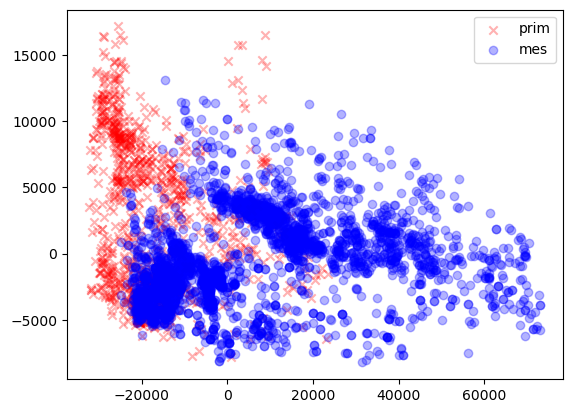

Explained coef ratio (LDA) for prim_mes: [0.95391284 0.03298031]

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.1248792659487934
wc2.1_30s_bio_10 = 0.08123526393596002
current_30arcsec_minTempWarmest = 0.07930964858076933
wc2.1_30s_bio_5 = 0.056443367870657686
wc2.1_30s_bio_4 = 0.050045279259778155
current_30arcsec_continentality = 0.048929337865724454
current_30arcsec_PETWettestQuarter = 0.03072320563020712
wc2.1_30s_elev = 0.027229838115699147
current_30arcsec_thermicityIndex = 0.026602956906678524
current_30arcsec_growingDegDays5 = 0.024415356051067018
current_30arcsec_PETDriestQuarter = 0.023963309049821052
sq7 = 0.022419137781497456
wc2.1_30s_bio_15 = 0.021205021809563553
wc2.1_30s_bio_7 = 0.018783241289763428
current_30arcsec_annualPET = 0.018601715673252656
wc2.1_30s_bio_3 = 0.018271217116809648
current_30arcsec_growingDegDays0 = 0.016196515716169417
wc2.1_30s_bio_9 = 0.014990568618648357
sq3 = 0.014319743158645792
wc2.1_30s_bio_18 = 0.013929314091585047
sq1 = 0.013640673746973473
wc2.1_30s_bio_13 = 0.01280830316088316
wc2.1_30s_bio_16 = 0.012631630351673534
sq4 = 0.01

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_8: 0.12728890866573875
wc2.1_30s_bio_10: 0.12324041474228581
current_30arcsec_minTempWarmest: 0.10676827711686078
wc2.1_30s_bio_5: 0.0927999055463844
current_30arcsec_continentality: 0.060774187228151956
wc2.1_30s_bio_4: 0.057440223878229474
current_30arcsec_growingDegDays5: 0.042166512641489406
current_30arcsec_PETWettestQuarter: 0.033078610361183855
current_30arcsec_PETDriestQuarter: 0.026164109182910886
wc2.1_30s_bio_15: 0.025231559282462415
sq7: 0.024683403817019296
wc2.1_30s_elev: 0.021432048608349734
wc2.1_30s_bio_18: 0.021174032382170402
wc2.1_30s_bio_7: 0.01915322296468748
wc2.1_30s_bio_9: 0.018790418590817138
wc2.1_30s_bio_3: 0.018591182368519688
wc2.1_30s_bio_16: 0.018467267287024698
sq5: 0.018094331961581306
wc2.1_30s_bio_12: 0.017948765966546737
GRS_2000: 0.017515845482007228
sq1: 0.016586966040781283
wc2.1_30s_bio_13: 0.016244529469839918
current_30arcsec_tri: 0.015893454363845944
current_30arcsec_topoWet: 0.015537598887900501
wc2.1_30s_bio_1: 0.0153672740781

Balanced accuracy estimation for the best feature subset:

[0.88471531 0.92094904 0.87248182 0.9111122  0.8828414 ]


Balanced accuracy estimation for all features in the experiment:

[0.88372306 0.91452874 0.87317052 0.9128054  0.88114915]


Datasets to compare: prim, steppe

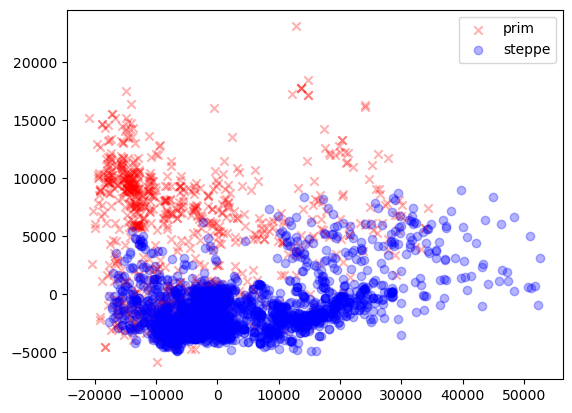

Explained coef ratio (LDA) for prim_steppe: [0.86941905 0.10930685]

Feature importances of all considered features:

current_30arcsec_embergerQ = 0.07582097598715061
current_30arcsec_PETseasonality = 0.06718783231529529
current_30arcsec_climaticMoistureIndex = 0.058952821856637944
wc2.1_30s_bio_12 = 0.05835653123696834
ai_v3_yr = 0.05709388121644217
wc2.1_30s_bio_17 = 0.04237038371472523
current_30arcsec_PETWarmestQuarter = 0.03897926762431819
current_30arcsec_aridityIndexThornthwaite = 0.03207101197951779
wc2.1_30s_bio_7 = 0.031665754510933036
wc2.1_30s_bio_4 = 0.028924679968161046
current_30arcsec_topoWet = 0.02677512698182039
current_30arcsec_continentality = 0.02465519907860487
wc2.1_30s_bio_14 = 0.02185093424426332
current_30arcsec_PETWettestQuarter = 0.018993883312249063
current_30arcsec_annualPET = 0.01874594977446182
wc2.1_30s_bio_5 = 0.018306014353626113
current_30arcsec_tri = 0.01800319962433979
wc2.1_30s_bio_19 = 0.01787914774194838
et0_v3_yr = 0.017443518854464816
FOR_2000 = 0.01672649725179122
wc2.1_30s_bio_10 = 0.016232249518131403
current_30arcsec_minTempWarmest = 0.01588793338087898
w

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

current_30arcsec_embergerQ: 0.08384550737900326
current_30arcsec_PETWarmestQuarter: 0.07812200376896267
current_30arcsec_PETseasonality: 0.06418179051019476
current_30arcsec_climaticMoistureIndex: 0.058884281430518
wc2.1_30s_bio_12: 0.05066530058825787
ai_v3_yr: 0.04647646311062736
current_30arcsec_aridityIndexThornthwaite: 0.04317293291709392
wc2.1_30s_bio_17: 0.033774113023175754
current_30arcsec_continentality: 0.029188483383116606
current_30arcsec_PETWettestQuarter: 0.025421435422670547
et0_v3_yr: 0.02123967838453224
current_30arcsec_tri: 0.019690286925090644
wc2.1_30s_bio_19: 0.01928655612009509
wc2.1_30s_bio_7: 0.01813830006369508
current_30arcsec_annualPET: 0.017540174207961005
wc2.1_30s_bio_9: 0.016777981400460537
current_30arcsec_topoWet: 0.016312337618783333
wc2.1_30s_bio_5: 0.014847108882681852
wc2.1_30s_bio_10: 0.01455530744087616
wc2.1_30s_bio_4: 0.014377250573463294
FOR_2000: 0.01433628299122085
wc2.1_30s_elev: 0.014154814390732816
GRS_2000: 0.014091236723208618
wc2.1_30s

Balanced accuracy estimation for the best feature subset:

[0.800212   0.79755762 0.80980894 0.79370214 0.79078866]


Balanced accuracy estimation for all features in the experiment:

[0.80495134 0.79848184 0.81390877 0.79277792 0.79647478]


Datasets to compare: prim, khanka_only

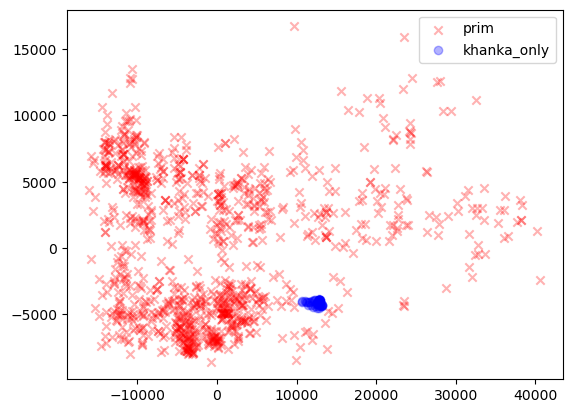

Explained coef ratio (LDA) for prim_khanka_only: [0.79975643 0.17503121]

Feature importances of all considered features:

wc2.1_30s_bio_8 = 0.1404201553596407
wc2.1_30s_bio_10 = 0.10006262207112629
current_30arcsec_minTempWarmest = 0.08873493900150294
wc2.1_30s_elev = 0.050349585212453196
current_30arcsec_continentality = 0.04695534172811236
wc2.1_30s_bio_5 = 0.04667189977613262
current_30arcsec_annualPET = 0.041261025164093065
current_30arcsec_thermicityIndex = 0.039225127474810974
current_30arcsec_growingDegDays5 = 0.036067275245895945
wc2.1_30s_bio_12 = 0.03428897796002929
wc2.1_30s_bio_6 = 0.03191546172881159
wc2.1_30s_bio_1 = 0.030597406410899163
current_30arcsec_maxTempColdest = 0.026528841818105046
wc2.1_30s_bio_7 = 0.022889279526100564
et0_v3_yr = 0.022654612553722905
wc2.1_30s_bio_19 = 0.02099189883689009
wc2.1_30s_bio_3 = 0.020021806012194478
wc2.1_30s_bio_11 = 0.019048381338078905
current_30arcsec_topoWet = 0.01714673353761966
wc2.1_30s_bio_18 = 0.016710253494260207
current_30arcsec_growingDegDays0 = 0.014222319751269053
wc2.1_30s_bio_13 = 0.013738725235283956
wc2.1_30s_bio_4 = 0.01316315131881

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_10: 0.13667711231211638
current_30arcsec_minTempWarmest: 0.1285904345815357
wc2.1_30s_bio_8: 0.10443972504828572
wc2.1_30s_elev: 0.055279677240326876
current_30arcsec_annualPET: 0.05026414621243833
current_30arcsec_growingDegDays5: 0.04191154364632021
wc2.1_30s_bio_5: 0.03806588229457471
wc2.1_30s_bio_12: 0.028845729874742387
current_30arcsec_continentality: 0.0288105669049845
current_30arcsec_PETDriestQuarter: 0.02706642236789947
wc2.1_30s_bio_18: 0.024558023821888722
wc2.1_30s_bio_9: 0.023730332571682892
current_30arcsec_thermicityIndex: 0.022449841952912112
wc2.1_30s_bio_6: 0.02212437131765488
wc2.1_30s_bio_7: 0.021731145828129107
wc2.1_30s_bio_4: 0.02096348351073186
wc2.1_30s_bio_3: 0.020133131224716792
wc2.1_30s_bio_15: 0.019194299815569152
wc2.1_30s_bio_11: 0.017114675711260467
wc2.1_30s_bio_16: 0.0159095422152753
et0_v3_yr: 0.014789899990427173
current_30arcsec_topoWet: 0.014592437325601875
wc2.1_30s_bio_13: 0.01132056489539009
current_30arcsec_climaticMoistureInde

Balanced accuracy estimation for the best feature subset:

[1.         0.99763033 1.         1.         1.        ]


Balanced accuracy estimation for all features in the experiment:

[1.         1.         1.         1.         0.95454545]


Datasets to compare: khanka, mes

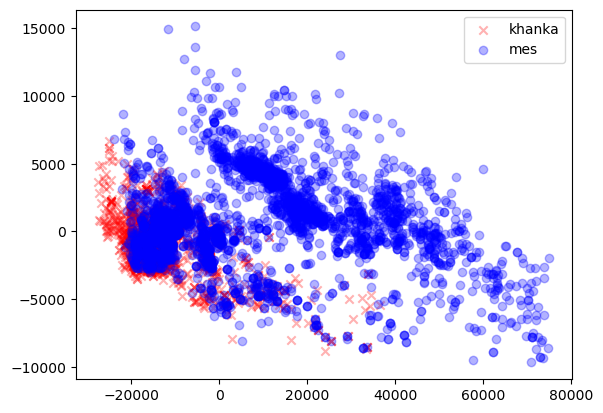

Explained coef ratio (LDA) for khanka_mes: [0.96885583 0.01895813]

Feature importances of all considered features:

wc2.1_30s_bio_12 = 0.06354213363969051
current_30arcsec_embergerQ = 0.056001723338487686
wc2.1_30s_bio_18 = 0.04585811545456365
wc2.1_30s_bio_1 = 0.041047003881521577
wc2.1_30s_bio_16 = 0.03455625465582796
wc2.1_30s_bio_11 = 0.031565759116548076
ai_v3_yr = 0.029734845538408234
wc2.1_30s_bio_13 = 0.029378021446318868
wc2.1_30s_bio_7 = 0.029316849536583485
current_30arcsec_minTempWarmest = 0.024138074665313692
current_30arcsec_PETColdestQuarter = 0.022627439136083786
current_30arcsec_maxTempColdest = 0.022488898384842596
current_30arcsec_climaticMoistureIndex = 0.021614854207553127
wc2.1_30s_elev = 0.020780020105600632
current_30arcsec_aridityIndexThornthwaite = 0.019294950859822118
current_30arcsec_tri = 0.019143164085924463
current_30arcsec_topoWet = 0.01789414488562848
current_30arcsec_annualPET = 0.017588684277347985
GRS_2000 = 0.01748091075409864
wc2.1_30s_bio_6 = 0.01664433202992283
FOR_2000 = 0.016615486337269753
wc2.1_30s_bio_4 = 0.016425187742207057
wc2.1_30s_bio_3 = 0.016403420

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_12: 0.09593857110105213
current_30arcsec_embergerQ: 0.08318042319335536
wc2.1_30s_bio_16: 0.0756579948900517
wc2.1_30s_bio_18: 0.059845352851957585
ai_v3_yr: 0.05661772032229238
wc2.1_30s_bio_13: 0.049858146085745764
current_30arcsec_growingDegDays0: 0.03854779323840514
wc2.1_30s_bio_1: 0.0379491390242456
wc2.1_30s_elev: 0.03344944130648958
current_30arcsec_aridityIndexThornthwaite: 0.033183283612408285
wc2.1_30s_bio_8: 0.03189173129583522
wc2.1_30s_bio_11: 0.031444519633179194
current_30arcsec_tri: 0.030265304699722374
current_30arcsec_topoWet: 0.030219946128366384
GRS_2000: 0.030064721979461466
CULTRF_2000: 0.02998476872426311
current_30arcsec_growingDegDays5: 0.029642530164499227
wc2.1_30s_bio_10: 0.029642126520937753
sq7: 0.02923487581605347
wc2.1_30s_bio_15: 0.028382749539205502
wc2.1_30s_bio_3: 0.027587469248410042
wc2.1_30s_bio_2: 0.02745287331239093
current_30arcsec_thermicityIndex: 0.027004600747196354
FOR_2000: 0.02699039645996437
wc2.1_30s_bio_4: 0.025963520104

Balanced accuracy estimation for the best feature subset:

[0.78851569 0.78001963 0.77354008 0.78584627 0.81062286]


Balanced accuracy estimation for all features in the experiment:

[0.77762135 0.7747812  0.78121826 0.78278909 0.80481086]


Datasets to compare: khanka, steppe

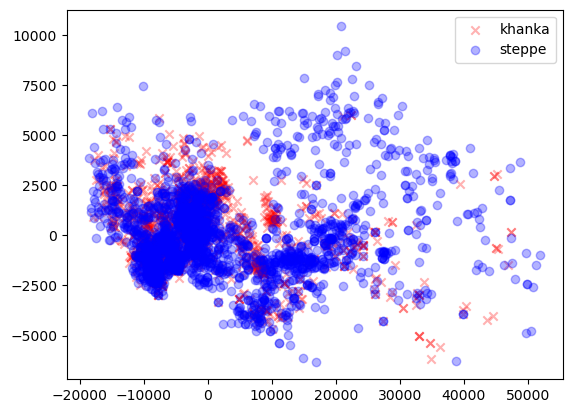

Explained coef ratio (LDA) for khanka_steppe: [0.94499436 0.02829378]

Feature importances of all considered features:

current_30arcsec_continentality = 0.04004528891412758
wc2.1_30s_bio_18 = 0.03419577215823951
wc2.1_30s_bio_3 = 0.03272104334305834
wc2.1_30s_bio_4 = 0.03261924041647589
current_30arcsec_aridityIndexThornthwaite = 0.03145819719581371
ai_v3_yr = 0.030765579267660777
current_30arcsec_PETDriestQuarter = 0.030369929456365415
wc2.1_30s_bio_13 = 0.030058407432542483
et0_v3_yr = 0.028001196150675402
wc2.1_30s_bio_15 = 0.02603063100763734
wc2.1_30s_bio_11 = 0.025526253460382297
wc2.1_30s_bio_9 = 0.02505333128711914
wc2.1_30s_bio_16 = 0.024957471688023293
current_30arcsec_tri = 0.023348565993575692
current_30arcsec_maxTempColdest = 0.022963595171219937
wc2.1_30s_elev = 0.0224447095841112
current_30arcsec_topoWet = 0.021959085960580597
wc2.1_30s_bio_12 = 0.02187720781365601
FOR_2000 = 0.021725567361517102
current_30arcsec_annualPET = 0.021069585555939054
wc2.1_30s_bio_1 = 0.020157009621474542
GRS_2000 = 0.020082494302599875
wc2.1_30s_bio_2 = 0.019540570025093566
current_30arcsec_embergerQ = 0.019

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

current_30arcsec_continentality: 0.04519456029929421
wc2.1_30s_bio_3: 0.04042529117019681
wc2.1_30s_bio_18: 0.03928425596628962
ai_v3_yr: 0.036805391300286906
wc2.1_30s_bio_4: 0.031494215781466564
current_30arcsec_PETDriestQuarter: 0.02899250251989671
wc2.1_30s_bio_9: 0.028312974371122825
current_30arcsec_aridityIndexThornthwaite: 0.02787093112617502
wc2.1_30s_bio_16: 0.02646818165856943
et0_v3_yr: 0.024889924046486073
wc2.1_30s_bio_12: 0.024631381093598054
wc2.1_30s_bio_13: 0.024020305547495444
current_30arcsec_maxTempColdest: 0.023638820785466187
current_30arcsec_tri: 0.023108643810808766
wc2.1_30s_bio_15: 0.022391750117358798
current_30arcsec_topoWet: 0.022273579393155205
FOR_2000: 0.02225877741197352
wc2.1_30s_elev: 0.022040726079168536
current_30arcsec_annualPET: 0.021935309693314645
wc2.1_30s_bio_11: 0.02085718933401975
wc2.1_30s_bio_2: 0.020261491334434792
current_30arcsec_thermicityIndex: 0.019996322837802404
wc2.1_30s_bio_10: 0.019646930956595175
wc2.1_30s_bio_1: 0.01946545281

Balanced accuracy estimation for the best feature subset:

[0.66982849 0.67939165 0.6741847  0.6969212  0.70357308]


Balanced accuracy estimation for all features in the experiment:

[0.66776945 0.6705421  0.68287355 0.70597686 0.70006066]


Datasets to compare: khanka, khanka_only

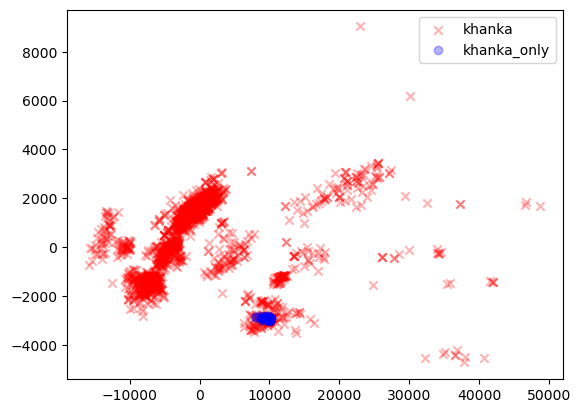

Explained coef ratio (LDA) for khanka_khanka_only: [0.92774023 0.0344887 ]

Feature importances of all considered features:

current_30arcsec_annualPET = 0.04293326394597586
wc2.1_30s_bio_1 = 0.04095442908393681
current_30arcsec_aridityIndexThornthwaite = 0.040733020241515226
current_30arcsec_PETDriestQuarter = 0.03903114012616214
wc2.1_30s_bio_9 = 0.03712123267462239
current_30arcsec_PETColdestQuarter = 0.034734904932608536
wc2.1_30s_bio_11 = 0.033108521638693676
current_30arcsec_continentality = 0.032558440069987475
wc2.1_30s_bio_4 = 0.02982312396694252
current_30arcsec_growingDegDays0 = 0.029458843773656537
current_30arcsec_growingDegDays5 = 0.029458298485479994
wc2.1_30s_bio_15 = 0.028132157298134695
wc2.1_30s_bio_10 = 0.026806480900262716
current_30arcsec_topoWet = 0.02460956080228156
current_30arcsec_thermicityIndex = 0.024476123500692514
wc2.1_30s_bio_13 = 0.024282225219583127
wc2.1_30s_bio_18 = 0.02385227858120419
wc2.1_30s_bio_8 = 0.023765596740241483
et0_v3_yr = 0.02345007730428692
ai_v3_yr = 0.022448834018637145
current_30arcsec_maxTempColdest = 0.02165317805129559
wc2.1_30s_elev = 0.0214723875324

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

current_30arcsec_PETDriestQuarter: 0.08725218250933242
wc2.1_30s_bio_9: 0.08572587652341744
wc2.1_30s_bio_11: 0.07698445925843032
current_30arcsec_annualPET: 0.07601416828247806
wc2.1_30s_bio_15: 0.06719506244192398
wc2.1_30s_bio_1: 0.06712902705999645
wc2.1_30s_bio_4: 0.06435106075448963
current_30arcsec_growingDegDays5: 0.063869832315238
current_30arcsec_thermicityIndex: 0.057895522701530734
current_30arcsec_growingDegDays0: 0.05616061936704456
wc2.1_30s_bio_10: 0.05606097306765696
ai_v3_yr: 0.05247226185962575
current_30arcsec_PETColdestQuarter: 0.05223296288959867
current_30arcsec_tri: 0.051669004509089074
current_30arcsec_aridityIndexThornthwaite: 0.050130547943354115
current_30arcsec_continentality: 0.034856438516793806


Balanced accuracy estimation for the best feature subset:

[0.64446903 0.59668142 0.62971175 0.53880266 0.63192905]


Balanced accuracy estimation for all features in the experiment:

[0.64446903 0.59778761 0.76718404 0.53880266 0.58425721]


Datasets to compare: mes, steppe

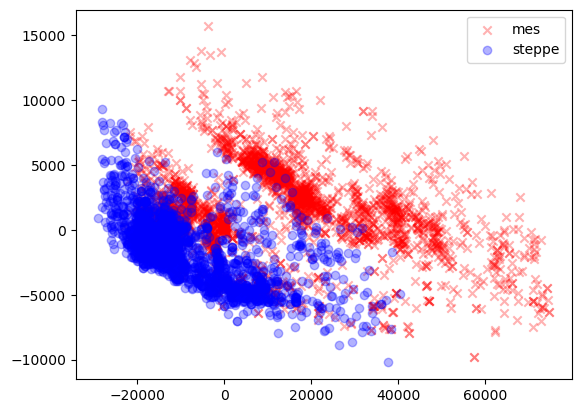

Explained coef ratio (LDA) for mes_steppe: [0.96335304 0.02247728]

Feature importances of all considered features:

wc2.1_30s_bio_18 = 0.08276850280775255
current_30arcsec_aridityIndexThornthwaite = 0.0826101338298877
wc2.1_30s_bio_16 = 0.075924006592674
wc2.1_30s_bio_13 = 0.0609336159296656
wc2.1_30s_bio_12 = 0.05608761269402811
ai_v3_yr = 0.036550555828065726
current_30arcsec_climaticMoistureIndex = 0.03409858202652393
NVG_2000 = 0.033200333732531284
current_30arcsec_minTempWarmest = 0.03232942911795645
wc2.1_30s_elev = 0.02757536336457428
current_30arcsec_embergerQ = 0.02506043700214094
wc2.1_30s_bio_8 = 0.02499772150557022
wc2.1_30s_bio_3 = 0.018967651383893305
wc2.1_30s_bio_10 = 0.018562416151796747
CULTRF_2000 = 0.016814817397118046
wc2.1_30s_bio_1 = 0.015127987065042947
CULT_2000 = 0.014745034954268241
wc2.1_30s_bio_15 = 0.014250796386658155
FOR_2000 = 0.013969347633215157
current_30arcsec_PETseasonality = 0.01304913117366442
current_30arcsec_annualPET = 0.012845563095285622
current_30arcsec_PETDriestQuarter = 0.012835151577341903
current_30arcsec_growingDegDays0 = 0.012770709414779034
curren

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_18: 0.12664591000860467
wc2.1_30s_bio_13: 0.0689353886075149
current_30arcsec_aridityIndexThornthwaite: 0.060925541686684646
ai_v3_yr: 0.056190376505773805
wc2.1_30s_bio_16: 0.05031067976628577
wc2.1_30s_bio_12: 0.04418038349953515
current_30arcsec_minTempWarmest: 0.03982401165238002
current_30arcsec_climaticMoistureIndex: 0.034526522190480614
NVG_2000: 0.031178612087721838
wc2.1_30s_bio_8: 0.024209638217236703
wc2.1_30s_elev: 0.02408307584351598
current_30arcsec_embergerQ: 0.02214316998171141
wc2.1_30s_bio_3: 0.020970956246335177
CULTRF_2000: 0.018746064568490445
wc2.1_30s_bio_10: 0.018120282872091203
wc2.1_30s_bio_15: 0.016610509224670725
FOR_2000: 0.015414801166679043
CULT_2000: 0.01497468243882059
current_30arcsec_PETseasonality: 0.014245785931609047
wc2.1_30s_bio_2: 0.01404678564647002
GRS_2000: 0.012945384363947533
current_30arcsec_thermicityIndex: 0.01287566558124376
et0_v3_yr: 0.012217748637375857
current_30arcsec_continentality: 0.011964476318295595
wc2.1_30s_bio

Balanced accuracy estimation for the best feature subset:

[0.88490543 0.86962466 0.87395676 0.87716477 0.87652954]


Balanced accuracy estimation for all features in the experiment:

[0.87867239 0.86822943 0.87466329 0.88318108 0.87584083]


Datasets to compare: mes, khanka_only

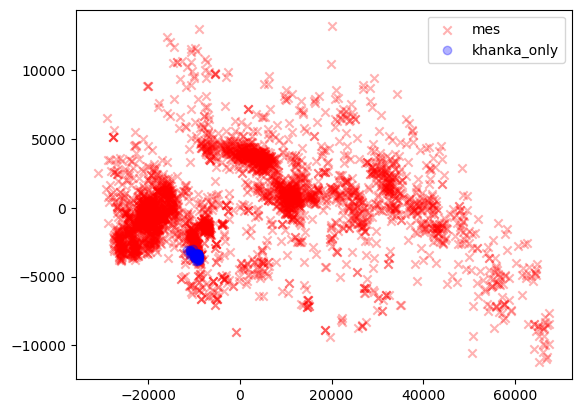

Explained coef ratio (LDA) for mes_khanka_only: [0.9662108 0.02039933]

Feature importances of all considered features:

et0_v3_yr = 0.05834628395870778
wc2.1_30s_bio_15 = 0.03772179818780889
wc2.1_30s_bio_9 = 0.035949968637813745
wc2.1_30s_elev = 0.035735521156904086
current_30arcsec_maxTempColdest = 0.03351205620211907
wc2.1_30s_bio_7 = 0.03165905308333334
wc2.1_30s_bio_1 = 0.031246158664329178
current_30arcsec_annualPET = 0.03094533454030304
wc2.1_30s_bio_11 = 0.030830443945326778
ai_v3_yr = 0.03058747335014496
current_30arcsec_growingDegDays5 = 0.02863089643989088
wc2.1_30s_bio_16 = 0.027915445948292525
current_30arcsec_PETColdestQuarter = 0.027834089604171608
wc2.1_30s_bio_2 = 0.02702530077618173
wc2.1_30s_bio_18 = 0.024689677548867417
current_30arcsec_PETDriestQuarter = 0.02429900702735187
wc2.1_30s_bio_10 = 0.023607558246115372
wc2.1_30s_bio_19 = 0.022822759745892793
wc2.1_30s_bio_8 = 0.02272493965855297
wc2.1_30s_bio_12 = 0.02264422018349009
wc2.1_30s_bio_4 = 0.0225288409350351
current_30arcsec_PETseasonality = 0.022187691257283433
wc2.1_30s_bio_13 = 0.02195618786491609
wc2.1_30s_bio_17 = 0.02096

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_bio_17: 0.04946649232974822
current_30arcsec_annualPET: 0.03615177567999722
wc2.1_30s_bio_9: 0.03524048597295518
et0_v3_yr: 0.033741406948764506
wc2.1_30s_bio_1: 0.033382768805180374
wc2.1_30s_bio_15: 0.03152057887638189
current_30arcsec_PETColdestQuarter: 0.030842742277632285
wc2.1_30s_bio_11: 0.030615683545338168
current_30arcsec_growingDegDays5: 0.030451682364185703
wc2.1_30s_bio_7: 0.028475449176081226
wc2.1_30s_bio_6: 0.028363779067177783
current_30arcsec_maxTempColdest: 0.028174658220975486
current_30arcsec_embergerQ: 0.028060486378609424
wc2.1_30s_bio_19: 0.02773575179220232
wc2.1_30s_bio_4: 0.027512968554596715
current_30arcsec_growingDegDays0: 0.0252278835838892
wc2.1_30s_bio_13: 0.024650448395662293
ai_v3_yr: 0.024453555925917046
current_30arcsec_PETseasonality: 0.024440110086462276
wc2.1_30s_bio_18: 0.02442402732152866
wc2.1_30s_bio_16: 0.023964693746890486
current_30arcsec_continentality: 0.02384542495069256
wc2.1_30s_bio_5: 0.023392366212459593
wc2.1_30s_bio_8: 0

Balanced accuracy estimation for the best feature subset:

[0.64931224 0.85743802 0.86088154 0.8161157  0.64862259]


Balanced accuracy estimation for all features in the experiment:

[0.64862448 0.85812672 0.95316804 0.76997245 0.64862259]


Datasets to compare: steppe, khanka_only

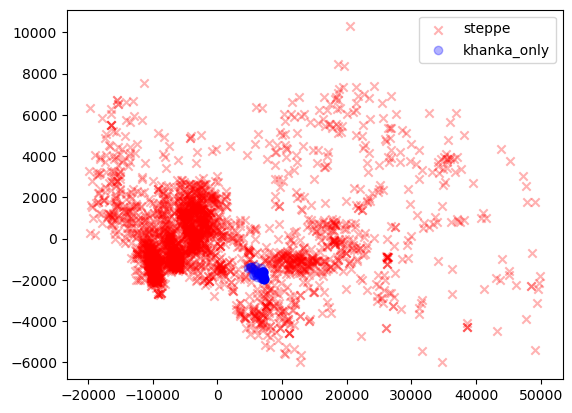

Explained coef ratio (LDA) for steppe_khanka_only: [0.9512422 0.02719026]

Feature importances of all considered features:

current_30arcsec_minTempWarmest = 0.05527197680251618
wc2.1_30s_bio_13 = 0.04942063312387542
wc2.1_30s_bio_4 = 0.04801215143433815
current_30arcsec_aridityIndexThornthwaite = 0.045749986940931374
wc2.1_30s_bio_16 = 0.04542731729973937
ai_v3_yr = 0.04299112683542736
et0_v3_yr = 0.03854851773958252
wc2.1_30s_bio_8 = 0.037198223128884766
wc2.1_30s_bio_15 = 0.03713741455837965
wc2.1_30s_bio_10 = 0.034214759218822346
current_30arcsec_embergerQ = 0.03343183339075244
wc2.1_30s_bio_18 = 0.030925600211944838
wc2.1_30s_elev = 0.029724618949612668
wc2.1_30s_bio_14 = 0.028671238236071803
wc2.1_30s_bio_11 = 0.02832309424471305
wc2.1_30s_bio_12 = 0.02615316866201203
current_30arcsec_PETDriestQuarter = 0.02570067951246783
current_30arcsec_growingDegDays5 = 0.02564349513782081
wc2.1_30s_bio_9 = 0.024206625254903417
current_30arcsec_maxTempColdest = 0.023676626891866715
current_30arcsec_climaticMoistureIndex = 0.02344527037127073
wc2.1_30s_bio_6 = 0.023315202008399438
wc2.1_30s_bio_17 = 0.0227168826153

Recursive feature elimination procedure, selection the most informative features from ['URB_2000', 'NVG_2000', 'GRS_2000', 'FOR_2000', 'CULTRF_2000', 'CULTIR_2000', 'CULT_2000', 'sq1', 'sq2', 'sq3', 'sq4', 'sq5', 'sq6', 'sq7', 'et0_v3_yr', 'ai_v3_yr', 'wc2.1_30s_bio_19', 'wc2.1_30s_bio_18', 'wc2.1_30s_bio_17', 'wc2.1_30s_bio_16', 'wc2.1_30s_bio_15', 'wc2.1_30s_bio_14', 'wc2.1_30s_bio_13', 'wc2.1_30s_bio_12', 'wc2.1_30s_bio_11', 'wc2.1_30s_bio_10', 'wc2.1_30s_bio_9', 'wc2.1_30s_bio_8', 'wc2.1_30s_bio_7', 'wc2.1_30s_bio_6', 'wc2.1_30s_bio_5', 'wc2.1_30s_bio_4', 'wc2.1_30s_bio_3', 'wc2.1_30s_bio_2', 'wc2.1_30s_bio_1', 'wc2.1_30s_elev', 'current_30arcsec_tri', 'current_30arcsec_topoWet', 'current_30arcsec_thermicityIndex', 'current_30arcsec_PETWettestQuarter', 'current_30arcsec_PETWarmestQuarter', 'current_30arcsec_PETseasonality', 'current_30arcsec_PETDriestQuarter', 'current_30arcsec_PETColdestQuarter', 'current_30arcsec_monthCountByTemp10', 'current_30arcsec_minTempWarmest', 'current_30arcsec_maxTempColdest', 'current_30arcsec_growingDegDays5', 'current_30arcsec_growingDegDays0', 'current_30arcsec_embergerQ', 'current_30arcsec_continentality', 'current_30arcsec_climaticMoistureIndex', 'current_30arcsec_aridityIndexThornthwaite', 'current_30arcsec_annualPET']

wc2.1_30s_elev: 0.11246819956858568
wc2.1_30s_bio_4: 0.08492513990489231
wc2.1_30s_bio_18: 0.08435770150218241
wc2.1_30s_bio_13: 0.07548455693507587
wc2.1_30s_bio_15: 0.07153571045065542
et0_v3_yr: 0.07053050645580569
current_30arcsec_aridityIndexThornthwaite: 0.05439911290764872
current_30arcsec_minTempWarmest: 0.0484200723974745
wc2.1_30s_bio_16: 0.04735490090236447
wc2.1_30s_bio_17: 0.04497578366528462
wc2.1_30s_bio_12: 0.044751893851427776
wc2.1_30s_bio_10: 0.042867363070842525
ai_v3_yr: 0.03845601265499092
wc2.1_30s_bio_7: 0.03718179303312263
wc2.1_30s_bio_8: 0.03645365682260396
wc2.1_30s_bio_9: 0.03416589739773372
wc2.1_30s_bio_6: 0.02954924116978537
current_30arcsec_growingDegDays0: 0.0225734887009633
wc2.1_30s_bio_3: 0.01954896860856008


Balanced accuracy estimation for the best feature subset:

[1. 1. 1. 1. 1.]


Balanced accuracy estimation for all features in the experiment:

[1. 1. 1. 1. 1.]


END OF COMPUTATIONS

In [142]:
analyze_all()

In [143]:
datasets = {
    'prim': data_prim,
    'khanka':data_khanka,
    'mes': data_mes,
    'steppe': data_steppe,
    'khanka_only': hanka_only,
    'checks': data_steppe_checks
}

for key, df in datasets.items():
    df.describe().to_csv(f'.\\stat\\{key}_stat.csv')

In [144]:
clf = RandomForestClassifier()
clf.fit(X, y)


RandomForestClassifier()